Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset

In [2]:
dataset = read_dataset()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1016], edge_attr=[1016, 1], y=[1])
['y', 'edge_attr', 'x', 'edge_index']
ValuesView({'x': tensor([[ 0.0000,  0.4543,  0.2477,  ...,  0.1753,  0.2247, -0.1751],
        [ 0.4543,  0.0000, -0.2204,  ..., -0.1947, -0.2258, -0.1434],
        [ 0.2477, -0.2204,  0.0000,  ..., -0.0521, -0.0804, -0.2025],
        ...,
        [ 0.1753, -0.1947, -0.0521,  ...,  0.0000,  0.6875, -0.1364],
        [ 0.2247, -0.2258, -0.0804,  ...,  0.6875,  0.0000,  0.0929],
        [-0.1751, -0.1434, -0.2025,  ..., -0.1364,  0.0929,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 114, 115, 115],
        [  1,  10,  12,  ..., 113,  94, 109]]), 'edge_attr': tensor([[0.4543],
        [0.5913],
        [0.4224],
        ...,
        [0.6875],
        [0.4846],
        [0.5437]]), 'y': tensor([0])})


1099

In [4]:
#set the seed
import torch
torch.manual_seed(37)

DATASET = "FC"

MODEL = "GIN"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)

MODELbis = "GINbis"
from models.models_FC import GIN_framework_bis as framework # import the model
gnnbis = framework(dataset)

MODELtri = "GINtri"
from models.models_FC import GIN_framework_tri as framework # import the model
gnntri = framework(dataset)

MODEL2 = "GIN2"
from models.models_FC import GIN_framework2 as framework2 # import the model
gnn2 = framework2(dataset)

MODEL3 = "GIN3"
from models.models_FC import GIN_framework3 as framework3 # import the model
gnn3 = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# gnn.iterate()

In [6]:
# gnnbis.iterate()

In [7]:
# gnntri.iterate()

In [8]:
# gnn2.iterate()

In [9]:
# gnn3.iterate()

In [10]:
# gnn3.cross_validate()

In [11]:
#gnn.train()

In [12]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnnbis.save_model(path="models/"+DATASET+"_"+MODELbis+"server.pt")

# gnntri.save_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

In [13]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt", map_location=torch.device('cpu'))

gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt", map_location=torch.device('cpu'))

gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt", map_location=torch.device('cpu'))

gnnbis.load_model(path="models/"+DATASET+"_"+MODELbis+"server.pt", map_location=torch.device('cpu'))

gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt", map_location=torch.device('cpu'))

In [14]:
gnn.evaluate()

Test Loss: 2.040, Train Acc: 0.999 Test Acc: 0.636


In [15]:
gnnbis.evaluate()

Test Loss: 1.525, Train Acc: 0.998 Test Acc: 0.655


In [16]:
gnntri.evaluate()

Test Loss: 2.643, Train Acc: 1.000 Test Acc: 0.509


In [17]:
gnn2.evaluate()

Test Loss: 2.830, Train Acc: 1.000 Test Acc: 0.586


In [18]:
gnn3.evaluate()

Accuracy: 0.691, Loss: 1.036


In [25]:
MODEL = MODEL3
MODEL

'GIN3'

In [20]:
# from torch_geometric.data import DataLoader
# test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

# gnn3.evaluate2(test_loader)

In [21]:
train_features, test_features = gnn3.evaluate_with_features2()

In [22]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1044, 55)

In [14]:
import networkx as nx
def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        #small_world = nx.algorithms.smallworld.sigma(G)

        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component)) #, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

KeyboardInterrupt: 

In [ ]:
print(len(train_properties))
train_properties[0:5]



In [23]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [27]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x5 = np.array([feat[5] for feat in train_features])
test_x5 = np.array([feat[5] for feat in test_features])

train_x_global = np.array([feat[6] for feat in train_features])
test_x_global = np.array([feat[6] for feat in test_features])

train_x6 = np.array([feat[7] for feat in train_features])
test_x6 = np.array([feat[7] for feat in test_features])

train_x7 = np.array([feat[8] for feat in train_features])
test_x7 = np.array([feat[8] for feat in test_features])

# train_x8 = np.array([feat[9] for feat in train_features])
# test_x8 = np.array([feat[9] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
# train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
# test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]#, (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7']#, 'x8']

In [ ]:
#create a dictionary where we will sotre the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 100000  # Adjust this as needed

        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Adjust this for more frequent/lower print frequency
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embdedding = embeddings_names[ii]
            results[(name_of_embdedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

In [24]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)    

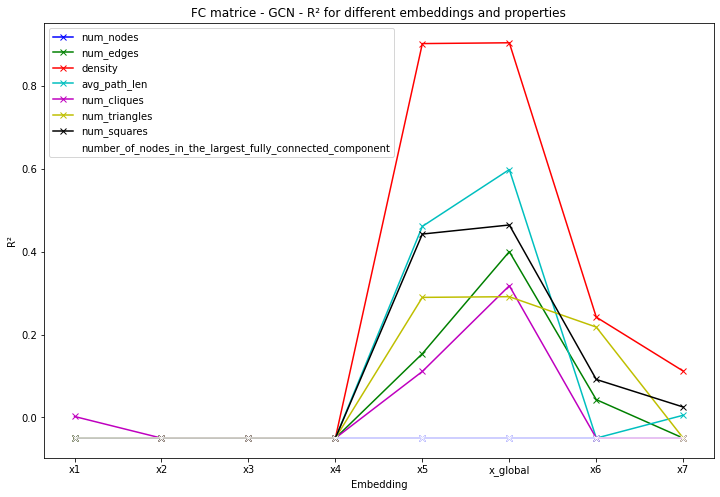

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
# property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
# embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot.png")


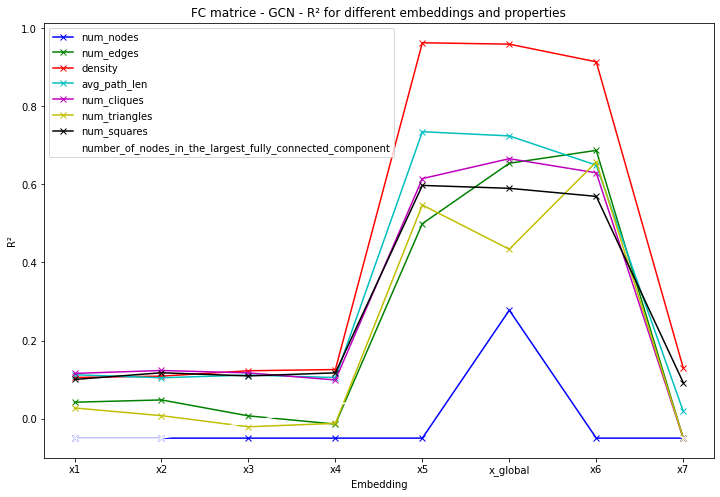

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']#, 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot.png")

In [32]:
results

{('x1', 'num_nodes'): (4.3371153,
  7.853936,
  -1.2496113777160645,
  -7.9182281494140625),
 ('x1', 'num_edges'): (20337.445,
  20424.877,
  0.04202932119369507,
  -0.13952815532684326),
 ('x1', 'density'): (0.0004103724,
  0.0004617122,
  0.10539329051971436,
  -0.15323865413665771),
 ('x1', 'avg_path_len'): (0.23916489,
  0.5176885,
  0.11239689588546753,
  -0.7487330436706543),
 ('x1', 'num_cliques'): (946.1469,
  765.57996,
  0.11579090356826782,
  0.002257823944091797),
 ('x1', 'num_triangles'): (564190.06,
  467938.2,
  0.02725958824157715,
  -0.0580286979675293),
 ('x1', 'num_squares'): (1.5593792,
  2.158648,
  0.1003313660621643,
  -0.4620513916015625),
 ('x1', 'number_of_nodes_in_the_largest_fully_connected_component'): (8.767505,
  9.757291,
  -0.2536911964416504,
  -2.238513231277466),
 ('x2', 'num_nodes'): (3.359905,
  49.32192,
  -0.7427436113357544,
  -55.00556564331055),
 ('x2', 'num_edges'): (20213.604,
  56144.69,
  0.047862708568573,
  -2.1323788166046143),
 ('x2', 

#### Test with more properties

In [34]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient
        ))
    return properties


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



Betweenness Centralization: 0.001086061741981193
PageRank Centralization: 0.009889108225082894
Average Clustering Coefficient: 0.5179222969842621
Transitivity: 0.5032389055399787
Betweenness Centralization: 0.0018289913557221417
PageRank Centralization: 0.006459017297712483
Average Clustering Coefficient: 0.5087813738549032
Transitivity: 0.5213549337260678
Betweenness Centralization: 0.00045402843483595716
PageRank Centralization: 0.005046367337979484
Average Clustering Coefficient: 0.5414121000696618
Transitivity: 0.5641200188511285
Betweenness Centralization: 0.0010550665108438862
PageRank Centralization: 0.006308393987013973
Average Clustering Coefficient: 0.6576803843183981
Transitivity: 0.6348624992240363
Betweenness Centralization: 0.001264968108251676
PageRank Centralization: 0.007700201326596413
Average Clustering Coefficient: 0.4949392448885353
Transitivity: 0.5178428227746592
Betweenness Centralization: 0.0018431551231994504
PageRank Centralization: 0.009662184686628855
Avera

Betweenness Centralization: 0.002249934020676841
PageRank Centralization: 0.006958093193469958
Average Clustering Coefficient: 0.5176604904495603
Transitivity: 0.5891551584077985
Betweenness Centralization: 0.0038523338856805292
PageRank Centralization: 0.009673819947146852
Average Clustering Coefficient: 0.39826718735809646
Transitivity: 0.5340035481963336
Betweenness Centralization: 0.0009415571619398711
PageRank Centralization: 0.006841847000195802
Average Clustering Coefficient: 0.441488221549468
Transitivity: 0.4850266397207422
Betweenness Centralization: 0.001708176235729968
PageRank Centralization: 0.006499278216215807
Average Clustering Coefficient: 0.5792587107642506
Transitivity: 0.6022845275181724
Betweenness Centralization: 0.0013510997350773552
PageRank Centralization: 0.008786855049144855
Average Clustering Coefficient: 0.4543976754269536
Transitivity: 0.4414048059149723
Betweenness Centralization: 0.0012972292108553332
PageRank Centralization: 0.006658958495318285
Averag

Betweenness Centralization: 0.0022671691216563806
PageRank Centralization: 0.007768459025854732
Average Clustering Coefficient: 0.577849554876937
Transitivity: 0.5667556742323098
Betweenness Centralization: 0.001454267042670509
PageRank Centralization: 0.006001335474472275
Average Clustering Coefficient: 0.5460483818540083
Transitivity: 0.5746121297602257
Betweenness Centralization: 0.0014496068652510448
PageRank Centralization: 0.008681186183223458
Average Clustering Coefficient: 0.5584861537502397
Transitivity: 0.5778382053025153
Betweenness Centralization: 0.002007966387081847
PageRank Centralization: 0.006671939099817724
Average Clustering Coefficient: 0.48545362139991277
Transitivity: 0.5018324607329843
Betweenness Centralization: 0.0017584473673798293
PageRank Centralization: 0.0073635679264833975
Average Clustering Coefficient: 0.5213172047784249
Transitivity: 0.5326941514860978
Betweenness Centralization: 0.0015424834418785048
PageRank Centralization: 0.01024257003646897
Averag

Betweenness Centralization: 0.0027119481097196917
PageRank Centralization: 0.007852615374744727
Average Clustering Coefficient: 0.5428112510914471
Transitivity: 0.5493345571363011
Betweenness Centralization: 0.0009129282512773135
PageRank Centralization: 0.006697696068120426
Average Clustering Coefficient: 0.5043614512796099
Transitivity: 0.5077755240027045
Betweenness Centralization: 0.0017956453412381632
PageRank Centralization: 0.009108386013990149
Average Clustering Coefficient: 0.5332475819111081
Transitivity: 0.5324466865397844
Betweenness Centralization: 0.0014673091251938282
PageRank Centralization: 0.010418666312293743
Average Clustering Coefficient: 0.45601639118218884
Transitivity: 0.4508833922261484
Betweenness Centralization: 0.001344188359494869
PageRank Centralization: 0.009310369122357299
Average Clustering Coefficient: 0.5394155159259717
Transitivity: 0.5651203416149069
Betweenness Centralization: 0.0011114625323693124
PageRank Centralization: 0.007313030133503113
Aver

Betweenness Centralization: 0.0030607172896678944
PageRank Centralization: 0.00747488219880637
Average Clustering Coefficient: 0.551372570399119
Transitivity: 0.6035196687370601
Betweenness Centralization: 0.0018904785148743163
PageRank Centralization: 0.008244167735453955
Average Clustering Coefficient: 0.4937877510139175
Transitivity: 0.47336531178995206
Betweenness Centralization: 0.0005971837392109634
PageRank Centralization: 0.006703150237079214
Average Clustering Coefficient: 0.4771392380310655
Transitivity: 0.5351647396331392
Betweenness Centralization: 0.002080298906700507
PageRank Centralization: 0.008982191184123335
Average Clustering Coefficient: 0.43892345681138784
Transitivity: 0.47729672650475186
Betweenness Centralization: 0.0027777833942006294
PageRank Centralization: 0.007932222696191668
Average Clustering Coefficient: 0.464393647288384
Transitivity: 0.47368421052631576
Betweenness Centralization: 0.0009275676153334862
PageRank Centralization: 0.008110773280972318
Aver

Betweenness Centralization: 0.0006455590906807535
PageRank Centralization: 0.00616522977321775
Average Clustering Coefficient: 0.4781515197997262
Transitivity: 0.5141950273320403
Betweenness Centralization: 0.0018203673654359255
PageRank Centralization: 0.007147031697340111
Average Clustering Coefficient: 0.4969713912411682
Transitivity: 0.4693569270608546
Betweenness Centralization: 0.0016494146200354827
PageRank Centralization: 0.007833006151079805
Average Clustering Coefficient: 0.5417520622019766
Transitivity: 0.5177895533686601
Betweenness Centralization: 0.0016024607162301034
PageRank Centralization: 0.008011892746391053
Average Clustering Coefficient: 0.5318215059884442
Transitivity: 0.512705798138869
Betweenness Centralization: 0.001162148076923222
PageRank Centralization: 0.007145103237351428
Average Clustering Coefficient: 0.4802668943869435
Transitivity: 0.5367577756833176
Betweenness Centralization: 0.001507008183020808
PageRank Centralization: 0.006051570403263156
Average 

Betweenness Centralization: 0.0012574010986898252
PageRank Centralization: 0.0070333742764222065
Average Clustering Coefficient: 0.44748232018052975
Transitivity: 0.45867768595041325
Betweenness Centralization: 0.0019304196654361069
PageRank Centralization: 0.008855875161050865
Average Clustering Coefficient: 0.49138375288223146
Transitivity: 0.4895833333333333
Betweenness Centralization: 0.0017669554093425939
PageRank Centralization: 0.007219000002810857
Average Clustering Coefficient: 0.4588723926572225
Transitivity: 0.6025531914893617
Betweenness Centralization: 0.0016185444657186088
PageRank Centralization: 0.007591867705972958
Average Clustering Coefficient: 0.4944107583238019
Transitivity: 0.5023584905660378
Betweenness Centralization: 0.001913941870110354
PageRank Centralization: 0.008215107998461391
Average Clustering Coefficient: 0.5492165940369999
Transitivity: 0.555765595463138
Betweenness Centralization: 0.0007686310905473608
PageRank Centralization: 0.005198475591750177
Av

Betweenness Centralization: 0.0017726197089032534
PageRank Centralization: 0.0057720408657632935
Average Clustering Coefficient: 0.5476128676119623
Transitivity: 0.5542057308860425
Betweenness Centralization: 0.0017956013103569701
PageRank Centralization: 0.00992834227923277
Average Clustering Coefficient: 0.4978453976737729
Transitivity: 0.5060670949321913
Betweenness Centralization: 0.0029431207085140907
PageRank Centralization: 0.007500776793950888
Average Clustering Coefficient: 0.47838234562372506
Transitivity: 0.5318084345961401
Betweenness Centralization: 0.0010911389744510127
PageRank Centralization: 0.006244197778644872
Average Clustering Coefficient: 0.474004013228151
Transitivity: 0.4905711206896552
Betweenness Centralization: 0.0020775894371335047
PageRank Centralization: 0.008400138616102877
Average Clustering Coefficient: 0.5302536211114138
Transitivity: 0.6321763447935516
Betweenness Centralization: 0.0031495150363905363
PageRank Centralization: 0.008046452316778243
Aver

Betweenness Centralization: 0.0006421228714372103
PageRank Centralization: 0.006547220929718533
Average Clustering Coefficient: 0.5210329653446675
Transitivity: 0.5526440410418311
Betweenness Centralization: 0.0022303841592928694
PageRank Centralization: 0.009727279175440692
Average Clustering Coefficient: 0.6153324922737486
Transitivity: 0.6393103448275862
Betweenness Centralization: 0.0012331573811127647
PageRank Centralization: 0.009096088071027015
Average Clustering Coefficient: 0.49653844260736885
Transitivity: 0.5154028436018957
Betweenness Centralization: 0.0013574321102590259
PageRank Centralization: 0.008854148765747343
Average Clustering Coefficient: 0.5244632624480272
Transitivity: 0.5152995628696323
Betweenness Centralization: 0.0009856385374173637
PageRank Centralization: 0.01089985214178111
Average Clustering Coefficient: 0.4454048914503167
Transitivity: 0.4459662602304994
Betweenness Centralization: 0.0016434815858207398
PageRank Centralization: 0.005390272990085286
Aver

Betweenness Centralization: 0.0018043381772499792
PageRank Centralization: 0.006687627140011902
Average Clustering Coefficient: 0.6005786255445925
Transitivity: 0.6189836579359749
Betweenness Centralization: 0.0016874067762550347
PageRank Centralization: 0.00756481856398947
Average Clustering Coefficient: 0.4601165850151652
Transitivity: 0.5204013377926422
Betweenness Centralization: 0.0015758687388136778
PageRank Centralization: 0.008527095347658034
Average Clustering Coefficient: 0.4785661577844241
Transitivity: 0.5396877033181522
Betweenness Centralization: 0.0037345580264380425
PageRank Centralization: 0.0071451836719845455
Average Clustering Coefficient: 0.5563293833834663
Transitivity: 0.6171728533933258
Betweenness Centralization: 0.0018538843768264848
PageRank Centralization: 0.006348457502806615
Average Clustering Coefficient: 0.521460021186095
Transitivity: 0.5507225007372456
Betweenness Centralization: 0.0010595741557186183
PageRank Centralization: 0.008145955683867378
Avera

PageRank Centralization: 0.007364803466579613
Average Clustering Coefficient: 0.4963897469415515
Transitivity: 0.490768094534712
Betweenness Centralization: 0.0035709011754109427
PageRank Centralization: 0.00891081020811883
Average Clustering Coefficient: 0.4804955622293085
Transitivity: 0.5050970075633016
Betweenness Centralization: 0.0018024012079577015
PageRank Centralization: 0.006656257847392205
Average Clustering Coefficient: 0.464207821164343
Transitivity: 0.5469924812030075
Betweenness Centralization: 0.002915486164353885
PageRank Centralization: 0.008879591382603058
Average Clustering Coefficient: 0.43744759139495976
Transitivity: 0.4269938650306748
Betweenness Centralization: 0.0028448004620705587
PageRank Centralization: 0.00965040176218437
Average Clustering Coefficient: 0.4283967783967782
Transitivity: 0.4916387959866221
Betweenness Centralization: 0.0019389516872158393
PageRank Centralization: 0.0068967411182083195
Average Clustering Coefficient: 0.5042633822432585
Transi

Betweenness Centralization: 0.0017345548870816641
PageRank Centralization: 0.008204686451480954
Average Clustering Coefficient: 0.47970082655681023
Transitivity: 0.4447646493756004
Betweenness Centralization: 0.00250580808197654
PageRank Centralization: 0.007212686835546926
Average Clustering Coefficient: 0.5678326547917583
Transitivity: 0.6132723112128147
Betweenness Centralization: 0.0008269175533117747
PageRank Centralization: 0.0068132030591250186
Average Clustering Coefficient: 0.5148793379174899
Transitivity: 0.49526290857413546
Betweenness Centralization: 0.0032354414233677943
PageRank Centralization: 0.009121581811029386
Average Clustering Coefficient: 0.5174565137927206
Transitivity: 0.5306451612903226
Betweenness Centralization: 0.0020847359721648602
PageRank Centralization: 0.012321066773739935
Average Clustering Coefficient: 0.457841857672801
Transitivity: 0.6401558560623424
Betweenness Centralization: 0.0008288443964271773
PageRank Centralization: 0.0061425150616404205
Ave

Betweenness Centralization: 0.0016796192371994472
PageRank Centralization: 0.008132492231621349
Average Clustering Coefficient: 0.529164389813477
Transitivity: 0.49911691981631934
Betweenness Centralization: 0.0018505558982255148
PageRank Centralization: 0.008386420393863553
Average Clustering Coefficient: 0.5251686358219987
Transitivity: 0.5505706414797323
Betweenness Centralization: 0.0008712998790981118
PageRank Centralization: 0.007745672929041464
Average Clustering Coefficient: 0.4638630313999964
Transitivity: 0.46268128758401134
Betweenness Centralization: 0.001654817697695922
PageRank Centralization: 0.0079914990414831
Average Clustering Coefficient: 0.49472785165278715
Transitivity: 0.5964308077645586
Betweenness Centralization: 0.0023573639403674223
PageRank Centralization: 0.007168701823390956
Average Clustering Coefficient: 0.5351196561722878
Transitivity: 0.6198453608247423
Betweenness Centralization: 0.0015355344540177328
PageRank Centralization: 0.007036506317354422
Avera

Betweenness Centralization: 0.0016129218128364741
PageRank Centralization: 0.005492282003335041
Average Clustering Coefficient: 0.5642525817094781
Transitivity: 0.5815024805102764
Betweenness Centralization: 0.0026928102128250704
PageRank Centralization: 0.010681684835313166
Average Clustering Coefficient: 0.507423700710639
Transitivity: 0.5324295177938684
Betweenness Centralization: 0.0020314179674239185
PageRank Centralization: 0.00918543062453907
Average Clustering Coefficient: 0.5253077705045992
Transitivity: 0.5892679695263332
Betweenness Centralization: 0.001534231060465542
PageRank Centralization: 0.009352959498517334
Average Clustering Coefficient: 0.48183507525612795
Transitivity: 0.48473967684021546
Betweenness Centralization: 0.0030079686366232287
PageRank Centralization: 0.007162817622252187
Average Clustering Coefficient: 0.5151663671127932
Transitivity: 0.5449379078088823
Betweenness Centralization: 0.0010728716253206524
PageRank Centralization: 0.007513259867720534
Avera

Betweenness Centralization: 0.0012033971813378128
PageRank Centralization: 0.0059348948190293405
Average Clustering Coefficient: 0.5084880396639765
Transitivity: 0.5445321307779031
Betweenness Centralization: 0.0016484739029092386
PageRank Centralization: 0.009148611984206462
Average Clustering Coefficient: 0.47475672723730794
Transitivity: 0.5129752564876282
Betweenness Centralization: 0.0019784537449887103
PageRank Centralization: 0.00930468011331531
Average Clustering Coefficient: 0.4668131768771154
Transitivity: 0.4545150501672241
Betweenness Centralization: 0.005387979050778052
PageRank Centralization: 0.007539049666415662
Average Clustering Coefficient: 0.5540887188720006
Transitivity: 0.5730975686769814
Betweenness Centralization: 0.006038392728659664
PageRank Centralization: 0.008899302928365134
Average Clustering Coefficient: 0.5617320953422421
Transitivity: 0.5880127137884062
Betweenness Centralization: 0.0015516474535888732
PageRank Centralization: 0.006951692890816766
Avera

Betweenness Centralization: 0.002184119259521994
PageRank Centralization: 0.006629867243140498
Average Clustering Coefficient: 0.4143278460669765
Transitivity: 0.4796650717703349
Betweenness Centralization: 0.002605643202483183
PageRank Centralization: 0.008537183819772344
Average Clustering Coefficient: 0.5529855344240279
Transitivity: 0.5782592454239821
Betweenness Centralization: 0.0020502174769468106
PageRank Centralization: 0.008077800587251207
Average Clustering Coefficient: 0.44095894526928997
Transitivity: 0.4639788499669531
Betweenness Centralization: 0.0014755976860036325
PageRank Centralization: 0.008910085007694232
Average Clustering Coefficient: 0.6003008560684792
Transitivity: 0.577722293814433
Betweenness Centralization: 0.002641040099671426
PageRank Centralization: 0.010159956511893956
Average Clustering Coefficient: 0.5190613386026804
Transitivity: 0.537841726618705
Betweenness Centralization: 0.0016484978386105272
PageRank Centralization: 0.008137750888951344
Average 

Betweenness Centralization: 0.0008740635230066906
PageRank Centralization: 0.006237101811494439
Average Clustering Coefficient: 0.539177416999715
Transitivity: 0.5696276751685723
Betweenness Centralization: 0.004390691191276613
PageRank Centralization: 0.00888217500036754
Average Clustering Coefficient: 0.47663226645527557
Transitivity: 0.5385256143273636
Betweenness Centralization: 0.0006063942135523048
PageRank Centralization: 0.006289538387387882
Average Clustering Coefficient: 0.514159204126005
Transitivity: 0.5612078152753108
Betweenness Centralization: 0.0014460103606761118
PageRank Centralization: 0.007916069017702877
Average Clustering Coefficient: 0.4644615850117878
Transitivity: 0.47235023041474655
Betweenness Centralization: 0.0013013513155687815
PageRank Centralization: 0.008475609401026441
Average Clustering Coefficient: 0.5202484833990332
Transitivity: 0.5411844792375766
Betweenness Centralization: 0.0013306029598389522
PageRank Centralization: 0.006165058423193593
Averag

Betweenness Centralization: 0.000946904100364308
PageRank Centralization: 0.005965014541061421
Average Clustering Coefficient: 0.5436630490201664
Transitivity: 0.5596886803250544
Betweenness Centralization: 0.002115424238880284
PageRank Centralization: 0.009981934017454716
Average Clustering Coefficient: 0.4010513516255143
Transitivity: 0.4862068965517241
Betweenness Centralization: 0.0010370560628975628
PageRank Centralization: 0.006113677787456329
Average Clustering Coefficient: 0.512545660772217
Transitivity: 0.5751266178953293
Betweenness Centralization: 0.00352702436172768
PageRank Centralization: 0.007809518317998699
Average Clustering Coefficient: 0.46085680192823036
Transitivity: 0.4699544135930377
Betweenness Centralization: 0.0007626336723224997
PageRank Centralization: 0.006630070936831617
Average Clustering Coefficient: 0.4402871270811911
Transitivity: 0.46248294679399726
Betweenness Centralization: 0.0012822995125620713
PageRank Centralization: 0.007524356846483867
Average

Betweenness Centralization: 0.0008680242720428117
PageRank Centralization: 0.008025651765772275
Average Clustering Coefficient: 0.4645239217341789
Transitivity: 0.48102643856920685
Betweenness Centralization: 0.0015210866819177985
PageRank Centralization: 0.007171731470552725
Average Clustering Coefficient: 0.4665562097357226
Transitivity: 0.5057915057915058
Betweenness Centralization: 0.0015204697184675263
PageRank Centralization: 0.007427168881187539
Average Clustering Coefficient: 0.5291114693387421
Transitivity: 0.5312605610003379
Betweenness Centralization: 0.00438585385697987
PageRank Centralization: 0.009120300581917288
Average Clustering Coefficient: 0.4387152179187576
Transitivity: 0.5359576078728236
Betweenness Centralization: 0.0009413104267108347
PageRank Centralization: 0.00801640461988958
Average Clustering Coefficient: 0.5410080980660184
Transitivity: 0.5329659889796694
Betweenness Centralization: 0.001089524489749557
PageRank Centralization: 0.006201443501673833
Average

Betweenness Centralization: 0.001344379660673526
PageRank Centralization: 0.006430121618631281
Average Clustering Coefficient: 0.532396333277665
Transitivity: 0.6209009009009009
Betweenness Centralization: 0.0014063380167544308
PageRank Centralization: 0.007603666119484385
Average Clustering Coefficient: 0.4935846506434744
Transitivity: 0.533288948069241
Betweenness Centralization: 0.002763530527829969
PageRank Centralization: 0.0075635088053431
Average Clustering Coefficient: 0.5137041773231033
Transitivity: 0.5866977829638274
Betweenness Centralization: 0.0013886666467540889
PageRank Centralization: 0.006331214662925075
Average Clustering Coefficient: 0.49095499989159935
Transitivity: 0.5170628834355828
Betweenness Centralization: 0.0016883081614622241
PageRank Centralization: 0.008794125355827161
Average Clustering Coefficient: 0.4651455640933328
Transitivity: 0.5191073066340569
Betweenness Centralization: 0.000934766826299802
PageRank Centralization: 0.008543723115657128
Average Cl

Betweenness Centralization: 0.0013959119193162341
PageRank Centralization: 0.005395707412499384
Average Clustering Coefficient: 0.504624688473573
Transitivity: 0.5092336103416436
Betweenness Centralization: 0.0026711976152805775
PageRank Centralization: 0.008107131712314844
Average Clustering Coefficient: 0.5103907194871484
Transitivity: 0.5218670327515199
Betweenness Centralization: 0.0019979433026104253
PageRank Centralization: 0.006515322950923503
Average Clustering Coefficient: 0.5068425827046518
Transitivity: 0.5583941605839416
Betweenness Centralization: 0.005138929649611487
PageRank Centralization: 0.008355024119724462
Average Clustering Coefficient: 0.550641293178363
Transitivity: 0.5918181818181818
Betweenness Centralization: 0.002234714424148594
PageRank Centralization: 0.013071180145397465
Average Clustering Coefficient: 0.41615507508364663
Transitivity: 0.4808467741935484
Betweenness Centralization: 0.001547043010828252
PageRank Centralization: 0.006554107959798369
Average 

Betweenness Centralization: 0.0008405565655393671
PageRank Centralization: 0.005618805458223556
Average Clustering Coefficient: 0.5091641303917225
Transitivity: 0.496783039763738
Betweenness Centralization: 0.0022042406006814387
PageRank Centralization: 0.0068138978147756326
Average Clustering Coefficient: 0.5633647143991153
Transitivity: 0.6008573469873779
Betweenness Centralization: 0.001518154583469654
PageRank Centralization: 0.004961409300821995
Average Clustering Coefficient: 0.5246387508230947
Transitivity: 0.5115373089601438
Betweenness Centralization: 0.00220825584221994
PageRank Centralization: 0.006492173003148195
Average Clustering Coefficient: 0.5521233020979472
Transitivity: 0.5932757413028251
Betweenness Centralization: 0.0017584473673798293
PageRank Centralization: 0.0073635679264833975
Average Clustering Coefficient: 0.5213172047784249
Transitivity: 0.5326941514860978
Betweenness Centralization: 0.003030275831623171
PageRank Centralization: 0.0064064578211270075
Averag

Betweenness Centralization: 0.0016356601709099923
PageRank Centralization: 0.008897534207293754
Average Clustering Coefficient: 0.502264513875791
Transitivity: 0.47616936377743296
Betweenness Centralization: 0.002818876537578845
PageRank Centralization: 0.007041820883552073
Average Clustering Coefficient: 0.5104067866998903
Transitivity: 0.5430338891877353
Betweenness Centralization: 0.001159043135332093
PageRank Centralization: 0.005705430755533083
Average Clustering Coefficient: 0.5392670119757231
Transitivity: 0.5356685177274669
Betweenness Centralization: 0.0010906266865349484
PageRank Centralization: 0.008552307621720046
Average Clustering Coefficient: 0.436434969295677
Transitivity: 0.43027591349739003
Betweenness Centralization: 0.004214605853583735
PageRank Centralization: 0.007288122008270084
Average Clustering Coefficient: 0.5824712944297773
Transitivity: 0.6308106429236982
Betweenness Centralization: 0.0024188167081628416
PageRank Centralization: 0.009030570611413893
Average

Betweenness Centralization: 0.001989396673659014
PageRank Centralization: 0.006890261737348976
Average Clustering Coefficient: 0.5705376995539835
Transitivity: 0.6238923163208077
Betweenness Centralization: 0.002751796785496164
PageRank Centralization: 0.0074519069506736365
Average Clustering Coefficient: 0.5538555953551242
Transitivity: 0.5599721059972106
Betweenness Centralization: 0.0013839476940816192
PageRank Centralization: 0.008895664780037858
Average Clustering Coefficient: 0.47983624728369734
Transitivity: 0.5060858424087123
Betweenness Centralization: 0.0038893200685687166
PageRank Centralization: 0.010710864793809944
Average Clustering Coefficient: 0.5505831338945831
Transitivity: 0.5780553077609277
Betweenness Centralization: 0.0008232270757044208
PageRank Centralization: 0.007341579770319
Average Clustering Coefficient: 0.5297192186673949
Transitivity: 0.558295174357168
Betweenness Centralization: 0.0017151449736280723
PageRank Centralization: 0.006859520328812198
Average 

In [35]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7239533/ipykernel_1735190/1310961172.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
/scratch-local/tpelletreaudur.7239533/ipykernel_1735190/1310961172.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 6578.3047
Epoch [2000/800000], Property: num_nodes, Loss: 3604.8198
Epoch [3000/800000], Property: num_nodes, Loss: 2448.7888
Epoch [4000/800000], Property: num_nodes, Loss: 1814.2560
Epoch [5000/800000], Property: num_nodes, Loss: 1286.7848
Epoch [6000/800000], Property: num_nodes, Loss: 868.6205
Epoch [7000/800000], Property: num_nodes, Loss: 575.7897
Epoch [8000/800000], Property: num_nodes, Loss: 395.1670
Epoch [9000/800000], Property: num_nodes, Loss: 292.6895
Epoch [10000/800000], Property: num_nodes, Loss: 231.4165
Epoch [11000/800000], Property: num_nodes, Loss: 189.5874
Epoch [12000/800000], Property: num_nodes, Loss: 158.5727
Epoch [13000/800000], Property: num_nodes, Loss: 134.5901
Epoch [14000/800000], Property: num_nodes, Loss: 115.5977
Epoch [15000/800000], Property: num_nodes, Loss: 100.3789
Epoch [16000/800000], Property: num_nodes, Loss: 88.3986
Epoch [17000/800000], Property: num_nodes, Loss: 79.2431
Epoch [18000/800000]

Epoch [12000/800000], Property: num_edges, Loss: 69751.2969
Epoch [13000/800000], Property: num_edges, Loss: 64986.4062
Epoch [14000/800000], Property: num_edges, Loss: 60532.2305
Epoch [15000/800000], Property: num_edges, Loss: 56367.4961
Epoch [16000/800000], Property: num_edges, Loss: 52503.6523
Epoch [17000/800000], Property: num_edges, Loss: 48952.1250
Epoch [18000/800000], Property: num_edges, Loss: 45714.7695
Epoch [19000/800000], Property: num_edges, Loss: 42786.6836
Epoch [20000/800000], Property: num_edges, Loss: 40159.6367
Epoch [21000/800000], Property: num_edges, Loss: 37826.5664
Epoch [22000/800000], Property: num_edges, Loss: 35776.2148
Epoch [23000/800000], Property: num_edges, Loss: 33990.4766
Epoch [24000/800000], Property: num_edges, Loss: 32446.2148
Epoch [25000/800000], Property: num_edges, Loss: 31120.4141
Epoch [26000/800000], Property: num_edges, Loss: 29992.9277
Epoch [27000/800000], Property: num_edges, Loss: 29040.4004
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 19953.6289
Epoch [149000/800000], Property: num_edges, Loss: 19947.8789
Epoch [150000/800000], Property: num_edges, Loss: 19942.1641
Epoch [151000/800000], Property: num_edges, Loss: 19936.4902
Epoch [152000/800000], Property: num_edges, Loss: 19930.8496
Epoch [153000/800000], Property: num_edges, Loss: 19925.2520
Epoch [154000/800000], Property: num_edges, Loss: 19919.6914
Epoch [155000/800000], Property: num_edges, Loss: 19914.1660
Epoch [156000/800000], Property: num_edges, Loss: 19908.6777
Epoch [157000/800000], Property: num_edges, Loss: 19903.2207
Epoch [158000/800000], Property: num_edges, Loss: 19897.8047
Epoch [159000/800000], Property: num_edges, Loss: 19892.4180
Epoch [160000/800000], Property: num_edges, Loss: 19887.0703
Epoch [161000/800000], Property: num_edges, Loss: 19881.7578
Epoch [162000/800000], Property: num_edges, Loss: 19876.4824
Epoch [163000/800000], Property: num_edges, Loss: 19871.2422
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 19417.0801
Epoch [284000/800000], Property: num_edges, Loss: 19414.0527
Epoch [285000/800000], Property: num_edges, Loss: 19411.0430
Epoch [286000/800000], Property: num_edges, Loss: 19408.0391
Epoch [287000/800000], Property: num_edges, Loss: 19405.0469
Epoch [288000/800000], Property: num_edges, Loss: 19402.0645
Epoch [289000/800000], Property: num_edges, Loss: 19399.0957
Epoch [290000/800000], Property: num_edges, Loss: 19396.1367
Epoch [291000/800000], Property: num_edges, Loss: 19393.1875
Epoch [292000/800000], Property: num_edges, Loss: 19390.2500
Epoch [293000/800000], Property: num_edges, Loss: 19387.3262
Epoch [294000/800000], Property: num_edges, Loss: 19384.4082
Epoch [295000/800000], Property: num_edges, Loss: 19381.5039
Epoch [296000/800000], Property: num_edges, Loss: 19378.6094
Epoch [297000/800000], Property: num_edges, Loss: 19375.7246
Epoch [298000/800000], Property: num_edges, Loss: 19372.8496
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 19106.7402
Epoch [419000/800000], Property: num_edges, Loss: 19105.1758
Epoch [420000/800000], Property: num_edges, Loss: 19103.6250
Epoch [421000/800000], Property: num_edges, Loss: 19102.0840
Epoch [422000/800000], Property: num_edges, Loss: 19100.5547
Epoch [423000/800000], Property: num_edges, Loss: 19099.0352
Epoch [424000/800000], Property: num_edges, Loss: 19097.5273
Epoch [425000/800000], Property: num_edges, Loss: 19096.0293
Epoch [426000/800000], Property: num_edges, Loss: 19094.5410
Epoch [427000/800000], Property: num_edges, Loss: 19093.0664
Epoch [428000/800000], Property: num_edges, Loss: 19091.5996
Epoch [429000/800000], Property: num_edges, Loss: 19090.1465
Epoch [430000/800000], Property: num_edges, Loss: 19088.7051
Epoch [431000/800000], Property: num_edges, Loss: 19087.2676
Epoch [432000/800000], Property: num_edges, Loss: 19085.8477
Epoch [433000/800000], Property: num_edges, Loss: 19084.4375
Epoch [434000/800000], P

Epoch [553000/800000], Property: num_edges, Loss: 18994.1797
Epoch [554000/800000], Property: num_edges, Loss: 18994.0527
Epoch [555000/800000], Property: num_edges, Loss: 18993.9355
Epoch [556000/800000], Property: num_edges, Loss: 18993.8242
Epoch [557000/800000], Property: num_edges, Loss: 18993.7266
Epoch [558000/800000], Property: num_edges, Loss: 18993.6328
Epoch [559000/800000], Property: num_edges, Loss: 18993.5508
Epoch [560000/800000], Property: num_edges, Loss: 18993.4785
Epoch [561000/800000], Property: num_edges, Loss: 18993.4180
Epoch [562000/800000], Property: num_edges, Loss: 18993.3633
Epoch [563000/800000], Property: num_edges, Loss: 18993.3203
Epoch [564000/800000], Property: num_edges, Loss: 18993.2832
Epoch [565000/800000], Property: num_edges, Loss: 18993.2559
Epoch [566000/800000], Property: num_edges, Loss: 18993.2383
Epoch [567000/800000], Property: num_edges, Loss: 18993.2227
Epoch [568000/800000], Property: num_edges, Loss: 18993.2168
Epoch [569000/800000], P

Epoch [15000/800000], Property: num_cliques, Loss: 1330.8950
Epoch [16000/800000], Property: num_cliques, Loss: 1285.7258
Epoch [17000/800000], Property: num_cliques, Loss: 1246.8925
Epoch [18000/800000], Property: num_cliques, Loss: 1213.6997
Epoch [19000/800000], Property: num_cliques, Loss: 1185.6697
Epoch [20000/800000], Property: num_cliques, Loss: 1162.0759
Epoch [21000/800000], Property: num_cliques, Loss: 1142.1077
Epoch [22000/800000], Property: num_cliques, Loss: 1125.0491
Epoch [23000/800000], Property: num_cliques, Loss: 1110.3503
Epoch [24000/800000], Property: num_cliques, Loss: 1097.6307
Epoch [25000/800000], Property: num_cliques, Loss: 1086.5493
Epoch [26000/800000], Property: num_cliques, Loss: 1076.8359
Epoch [27000/800000], Property: num_cliques, Loss: 1068.3303
Epoch [28000/800000], Property: num_cliques, Loss: 1060.9111
Epoch [29000/800000], Property: num_cliques, Loss: 1054.4343
Epoch [30000/800000], Property: num_cliques, Loss: 1048.7406
Epoch [31000/800000], Pr

Epoch [151000/800000], Property: num_cliques, Loss: 921.6612
Epoch [152000/800000], Property: num_cliques, Loss: 921.4504
Epoch [153000/800000], Property: num_cliques, Loss: 921.2520
Epoch [154000/800000], Property: num_cliques, Loss: 921.0634
Epoch [155000/800000], Property: num_cliques, Loss: 920.8845
Epoch [156000/800000], Property: num_cliques, Loss: 920.7151
Epoch [157000/800000], Property: num_cliques, Loss: 920.5553
Epoch [158000/800000], Property: num_cliques, Loss: 920.4059
Epoch [159000/800000], Property: num_cliques, Loss: 920.2672
Epoch [160000/800000], Property: num_cliques, Loss: 920.1379
Epoch [161000/800000], Property: num_cliques, Loss: 920.0178
Epoch [162000/800000], Property: num_cliques, Loss: 919.9086
Epoch [163000/800000], Property: num_cliques, Loss: 919.8085
Epoch [164000/800000], Property: num_cliques, Loss: 919.7183
Epoch [165000/800000], Property: num_cliques, Loss: 919.6371
Epoch [166000/800000], Property: num_cliques, Loss: 919.5658
Epoch [167000/800000], P

Epoch [97000/800000], Property: num_triangles, Loss: 565662.3125
Epoch [98000/800000], Property: num_triangles, Loss: 565159.2500
Epoch [99000/800000], Property: num_triangles, Loss: 564664.8125
Epoch [100000/800000], Property: num_triangles, Loss: 564178.7500
Epoch [101000/800000], Property: num_triangles, Loss: 563700.8125
Epoch [102000/800000], Property: num_triangles, Loss: 563230.8125
Epoch [103000/800000], Property: num_triangles, Loss: 562768.8125
Epoch [104000/800000], Property: num_triangles, Loss: 562314.5625
Epoch [105000/800000], Property: num_triangles, Loss: 561868.0000
Epoch [106000/800000], Property: num_triangles, Loss: 561428.8125
Epoch [107000/800000], Property: num_triangles, Loss: 560996.8125
Epoch [108000/800000], Property: num_triangles, Loss: 560572.0625
Epoch [109000/800000], Property: num_triangles, Loss: 560154.2500
Epoch [110000/800000], Property: num_triangles, Loss: 559743.1875
Epoch [111000/800000], Property: num_triangles, Loss: 559338.9375
Epoch [112000

Epoch [222000/800000], Property: num_triangles, Loss: 536091.3125
Epoch [223000/800000], Property: num_triangles, Loss: 535986.8750
Epoch [224000/800000], Property: num_triangles, Loss: 535883.5000
Epoch [225000/800000], Property: num_triangles, Loss: 535781.3750
Epoch [226000/800000], Property: num_triangles, Loss: 535680.5000
Epoch [227000/800000], Property: num_triangles, Loss: 535580.6250
Epoch [228000/800000], Property: num_triangles, Loss: 535482.0000
Epoch [229000/800000], Property: num_triangles, Loss: 535384.5000
Epoch [230000/800000], Property: num_triangles, Loss: 535288.0625
Epoch [231000/800000], Property: num_triangles, Loss: 535192.7500
Epoch [232000/800000], Property: num_triangles, Loss: 535098.5625
Epoch [233000/800000], Property: num_triangles, Loss: 535005.3750
Epoch [234000/800000], Property: num_triangles, Loss: 534913.3750
Epoch [235000/800000], Property: num_triangles, Loss: 534822.2500
Epoch [236000/800000], Property: num_triangles, Loss: 534732.1875
Epoch [237

Epoch [347000/800000], Property: num_triangles, Loss: 528990.5625
Epoch [348000/800000], Property: num_triangles, Loss: 528965.5625
Epoch [349000/800000], Property: num_triangles, Loss: 528940.8125
Epoch [350000/800000], Property: num_triangles, Loss: 528916.3750
Epoch [351000/800000], Property: num_triangles, Loss: 528892.1875
Epoch [352000/800000], Property: num_triangles, Loss: 528868.3125
Epoch [353000/800000], Property: num_triangles, Loss: 528844.6250
Epoch [354000/800000], Property: num_triangles, Loss: 528821.1875
Epoch [355000/800000], Property: num_triangles, Loss: 528798.0625
Epoch [356000/800000], Property: num_triangles, Loss: 528774.9375
Epoch [357000/800000], Property: num_triangles, Loss: 528752.1250
Epoch [358000/800000], Property: num_triangles, Loss: 528729.3750
Epoch [359000/800000], Property: num_triangles, Loss: 528706.8125
Epoch [360000/800000], Property: num_triangles, Loss: 528684.5000
Epoch [361000/800000], Property: num_triangles, Loss: 528662.2500
Epoch [362

Epoch [472000/800000], Property: num_triangles, Loss: 526861.1875
Epoch [473000/800000], Property: num_triangles, Loss: 526848.9375
Epoch [474000/800000], Property: num_triangles, Loss: 526836.8125
Epoch [475000/800000], Property: num_triangles, Loss: 526824.7500
Epoch [476000/800000], Property: num_triangles, Loss: 526812.7500
Epoch [477000/800000], Property: num_triangles, Loss: 526800.8125
Epoch [478000/800000], Property: num_triangles, Loss: 526788.8125
Epoch [479000/800000], Property: num_triangles, Loss: 526777.0625
Epoch [480000/800000], Property: num_triangles, Loss: 526765.2500
Epoch [481000/800000], Property: num_triangles, Loss: 526753.5625
Epoch [482000/800000], Property: num_triangles, Loss: 526741.8125
Epoch [483000/800000], Property: num_triangles, Loss: 526730.1875
Epoch [484000/800000], Property: num_triangles, Loss: 526718.5625
Epoch [485000/800000], Property: num_triangles, Loss: 526707.0625
Epoch [486000/800000], Property: num_triangles, Loss: 526695.6250
Epoch [487

Epoch [597000/800000], Property: num_triangles, Loss: 525686.5625
Epoch [598000/800000], Property: num_triangles, Loss: 525679.5000
Epoch [599000/800000], Property: num_triangles, Loss: 525672.4375
Epoch [600000/800000], Property: num_triangles, Loss: 525665.5625
Epoch [601000/800000], Property: num_triangles, Loss: 525658.6250
Epoch [602000/800000], Property: num_triangles, Loss: 525651.7500
Epoch [603000/800000], Property: num_triangles, Loss: 525644.8125
Epoch [604000/800000], Property: num_triangles, Loss: 525638.0000
Epoch [605000/800000], Property: num_triangles, Loss: 525631.1875
Epoch [606000/800000], Property: num_triangles, Loss: 525624.5000
Epoch [607000/800000], Property: num_triangles, Loss: 525617.7500
Epoch [608000/800000], Property: num_triangles, Loss: 525611.1250
Epoch [609000/800000], Property: num_triangles, Loss: 525604.5000
Epoch [610000/800000], Property: num_triangles, Loss: 525597.8750
Epoch [611000/800000], Property: num_triangles, Loss: 525591.3125
Epoch [612

Epoch [722000/800000], Property: num_triangles, Loss: 524970.4375
Epoch [723000/800000], Property: num_triangles, Loss: 524965.3750
Epoch [724000/800000], Property: num_triangles, Loss: 524960.5000
Epoch [725000/800000], Property: num_triangles, Loss: 524955.4375
Epoch [726000/800000], Property: num_triangles, Loss: 524950.4375
Epoch [727000/800000], Property: num_triangles, Loss: 524945.6250
Epoch [728000/800000], Property: num_triangles, Loss: 524940.6250
Epoch [729000/800000], Property: num_triangles, Loss: 524935.7500
Epoch [730000/800000], Property: num_triangles, Loss: 524930.7500
Epoch [731000/800000], Property: num_triangles, Loss: 524925.8750
Epoch [732000/800000], Property: num_triangles, Loss: 524920.9375
Epoch [733000/800000], Property: num_triangles, Loss: 524916.1250
Epoch [734000/800000], Property: num_triangles, Loss: 524911.1875
Epoch [735000/800000], Property: num_triangles, Loss: 524906.3750
Epoch [736000/800000], Property: num_triangles, Loss: 524901.5000
Epoch [737

Epoch [23000/800000], Property: largest_component_size, Loss: 58.2711
Epoch [24000/800000], Property: largest_component_size, Loss: 56.5027
Epoch [25000/800000], Property: largest_component_size, Loss: 55.0102
Epoch [26000/800000], Property: largest_component_size, Loss: 53.7228
Epoch [27000/800000], Property: largest_component_size, Loss: 52.5778
Epoch [28000/800000], Property: largest_component_size, Loss: 51.5218
Epoch [29000/800000], Property: largest_component_size, Loss: 50.5198
Epoch [30000/800000], Property: largest_component_size, Loss: 49.5531
Epoch [31000/800000], Property: largest_component_size, Loss: 48.6082
Epoch [32000/800000], Property: largest_component_size, Loss: 47.6761
Epoch [33000/800000], Property: largest_component_size, Loss: 46.7529
Epoch [34000/800000], Property: largest_component_size, Loss: 45.8400
Epoch [35000/800000], Property: largest_component_size, Loss: 44.9376
Epoch [36000/800000], Property: largest_component_size, Loss: 44.0456
Epoch [37000/800000]

Epoch [11000/800000], Property: avg_degree, Loss: 5.6907
Epoch [12000/800000], Property: avg_degree, Loss: 5.6476
Epoch [13000/800000], Property: avg_degree, Loss: 5.6113
Epoch [14000/800000], Property: avg_degree, Loss: 5.5823
Epoch [15000/800000], Property: avg_degree, Loss: 5.5609
Epoch [16000/800000], Property: avg_degree, Loss: 5.5465
Epoch [17000/800000], Property: avg_degree, Loss: 5.5383
Epoch [18000/800000], Property: avg_degree, Loss: 5.5345
Epoch [19000/800000], Property: avg_degree, Loss: 5.5333
Epoch [20000/800000], Property: avg_degree, Loss: 5.5332
Epoch [21000/800000], Property: avg_degree, Loss: 5.5332
Epoch [22000/800000], Property: avg_degree, Loss: 5.5332
Epoch [23000/800000], Property: avg_degree, Loss: 5.5332
Early stopping at epoch 23631
Embedding: torch.Size([1044, 128])
Property: avg_degree
  Train MSE: 5.5332, Test MSE: 6.0343
  Train R²: 0.1053, Test R²: -0.1370
Epoch [1000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [2000/800000], Prope

Epoch [55000/800000], Property: graph_energy, Loss: 109949.3438
Epoch [56000/800000], Property: graph_energy, Loss: 108662.2578
Epoch [57000/800000], Property: graph_energy, Loss: 107470.8906
Epoch [58000/800000], Property: graph_energy, Loss: 106366.5000
Epoch [59000/800000], Property: graph_energy, Loss: 105340.6016
Epoch [60000/800000], Property: graph_energy, Loss: 104386.7422
Epoch [61000/800000], Property: graph_energy, Loss: 103500.6953
Epoch [62000/800000], Property: graph_energy, Loss: 102676.5391
Epoch [63000/800000], Property: graph_energy, Loss: 101909.2969
Epoch [64000/800000], Property: graph_energy, Loss: 101194.4609
Epoch [65000/800000], Property: graph_energy, Loss: 100525.0938
Epoch [66000/800000], Property: graph_energy, Loss: 99892.1484
Epoch [67000/800000], Property: graph_energy, Loss: 99290.4375
Epoch [68000/800000], Property: graph_energy, Loss: 98717.0000
Epoch [69000/800000], Property: graph_energy, Loss: 98168.2031
Epoch [70000/800000], Property: graph_energy

Epoch [184000/800000], Property: graph_energy, Loss: 81644.2734
Epoch [185000/800000], Property: graph_energy, Loss: 81615.2656
Epoch [186000/800000], Property: graph_energy, Loss: 81586.6797
Epoch [187000/800000], Property: graph_energy, Loss: 81558.5391
Epoch [188000/800000], Property: graph_energy, Loss: 81530.8203
Epoch [189000/800000], Property: graph_energy, Loss: 81503.5312
Epoch [190000/800000], Property: graph_energy, Loss: 81476.6719
Epoch [191000/800000], Property: graph_energy, Loss: 81450.2344
Epoch [192000/800000], Property: graph_energy, Loss: 81424.2031
Epoch [193000/800000], Property: graph_energy, Loss: 81398.5625
Epoch [194000/800000], Property: graph_energy, Loss: 81373.3359
Epoch [195000/800000], Property: graph_energy, Loss: 81348.4609
Epoch [196000/800000], Property: graph_energy, Loss: 81323.9688
Epoch [197000/800000], Property: graph_energy, Loss: 81299.8438
Epoch [198000/800000], Property: graph_energy, Loss: 81276.0547
Epoch [199000/800000], Property: graph_e

Epoch [313000/800000], Property: graph_energy, Loss: 79564.1875
Epoch [314000/800000], Property: graph_energy, Loss: 79553.3203
Epoch [315000/800000], Property: graph_energy, Loss: 79542.5000
Epoch [316000/800000], Property: graph_energy, Loss: 79531.7031
Epoch [317000/800000], Property: graph_energy, Loss: 79520.9531
Epoch [318000/800000], Property: graph_energy, Loss: 79510.2266
Epoch [319000/800000], Property: graph_energy, Loss: 79499.5469
Epoch [320000/800000], Property: graph_energy, Loss: 79488.9062
Epoch [321000/800000], Property: graph_energy, Loss: 79478.2969
Epoch [322000/800000], Property: graph_energy, Loss: 79467.7266
Epoch [323000/800000], Property: graph_energy, Loss: 79457.2031
Epoch [324000/800000], Property: graph_energy, Loss: 79446.6875
Epoch [325000/800000], Property: graph_energy, Loss: 79436.2266
Epoch [326000/800000], Property: graph_energy, Loss: 79425.8125
Epoch [327000/800000], Property: graph_energy, Loss: 79415.4141
Epoch [328000/800000], Property: graph_e

Epoch [442000/800000], Property: graph_energy, Loss: 78439.1719
Epoch [443000/800000], Property: graph_energy, Loss: 78431.8594
Epoch [444000/800000], Property: graph_energy, Loss: 78424.5703
Epoch [445000/800000], Property: graph_energy, Loss: 78417.2969
Epoch [446000/800000], Property: graph_energy, Loss: 78410.0234
Epoch [447000/800000], Property: graph_energy, Loss: 78402.7578
Epoch [448000/800000], Property: graph_energy, Loss: 78395.5078
Epoch [449000/800000], Property: graph_energy, Loss: 78388.2734
Epoch [450000/800000], Property: graph_energy, Loss: 78381.0391
Epoch [451000/800000], Property: graph_energy, Loss: 78373.8203
Epoch [452000/800000], Property: graph_energy, Loss: 78366.6172
Epoch [453000/800000], Property: graph_energy, Loss: 78359.4297
Epoch [454000/800000], Property: graph_energy, Loss: 78352.2422
Epoch [455000/800000], Property: graph_energy, Loss: 78345.0781
Epoch [456000/800000], Property: graph_energy, Loss: 78337.9141
Epoch [457000/800000], Property: graph_e

Epoch [571000/800000], Property: graph_energy, Loss: 77596.3125
Epoch [572000/800000], Property: graph_energy, Loss: 77590.5703
Epoch [573000/800000], Property: graph_energy, Loss: 77584.8359
Epoch [574000/800000], Property: graph_energy, Loss: 77579.1094
Epoch [575000/800000], Property: graph_energy, Loss: 77573.3984
Epoch [576000/800000], Property: graph_energy, Loss: 77567.6953
Epoch [577000/800000], Property: graph_energy, Loss: 77562.0078
Epoch [578000/800000], Property: graph_energy, Loss: 77556.3125
Epoch [579000/800000], Property: graph_energy, Loss: 77550.6484
Epoch [580000/800000], Property: graph_energy, Loss: 77544.9844
Epoch [581000/800000], Property: graph_energy, Loss: 77539.3281
Epoch [582000/800000], Property: graph_energy, Loss: 77533.6875
Epoch [583000/800000], Property: graph_energy, Loss: 77528.0547
Epoch [584000/800000], Property: graph_energy, Loss: 77522.4297
Epoch [585000/800000], Property: graph_energy, Loss: 77516.8203
Epoch [586000/800000], Property: graph_e

Epoch [700000/800000], Property: graph_energy, Loss: 76939.3281
Epoch [701000/800000], Property: graph_energy, Loss: 76934.8984
Epoch [702000/800000], Property: graph_energy, Loss: 76930.4688
Epoch [703000/800000], Property: graph_energy, Loss: 76926.0625
Epoch [704000/800000], Property: graph_energy, Loss: 76921.6641
Epoch [705000/800000], Property: graph_energy, Loss: 76917.2734
Epoch [706000/800000], Property: graph_energy, Loss: 76912.8906
Epoch [707000/800000], Property: graph_energy, Loss: 76908.5234
Epoch [708000/800000], Property: graph_energy, Loss: 76904.1641
Epoch [709000/800000], Property: graph_energy, Loss: 76899.8125
Epoch [710000/800000], Property: graph_energy, Loss: 76895.4766
Epoch [711000/800000], Property: graph_energy, Loss: 76891.1406
Epoch [712000/800000], Property: graph_energy, Loss: 76886.8281
Epoch [713000/800000], Property: graph_energy, Loss: 76882.5156
Epoch [714000/800000], Property: graph_energy, Loss: 76878.2109
Epoch [715000/800000], Property: graph_e

Epoch [7000/800000], Property: num_nodes, Loss: 608.6078
Epoch [8000/800000], Property: num_nodes, Loss: 476.5074
Epoch [9000/800000], Property: num_nodes, Loss: 399.2352
Epoch [10000/800000], Property: num_nodes, Loss: 332.3390
Epoch [11000/800000], Property: num_nodes, Loss: 272.2011
Epoch [12000/800000], Property: num_nodes, Loss: 221.0782
Epoch [13000/800000], Property: num_nodes, Loss: 178.8051
Epoch [14000/800000], Property: num_nodes, Loss: 144.6564
Epoch [15000/800000], Property: num_nodes, Loss: 118.0510
Epoch [16000/800000], Property: num_nodes, Loss: 97.7974
Epoch [17000/800000], Property: num_nodes, Loss: 82.4718
Epoch [18000/800000], Property: num_nodes, Loss: 70.9105
Epoch [19000/800000], Property: num_nodes, Loss: 62.2111
Epoch [20000/800000], Property: num_nodes, Loss: 55.6685
Epoch [21000/800000], Property: num_nodes, Loss: 50.6358
Epoch [22000/800000], Property: num_nodes, Loss: 46.6346
Epoch [23000/800000], Property: num_nodes, Loss: 43.3682
Epoch [24000/800000], Pro

Epoch [15000/800000], Property: num_edges, Loss: 71053.4453
Epoch [16000/800000], Property: num_edges, Loss: 64879.1250
Epoch [17000/800000], Property: num_edges, Loss: 59282.7969
Epoch [18000/800000], Property: num_edges, Loss: 54256.1680
Epoch [19000/800000], Property: num_edges, Loss: 49787.3086
Epoch [20000/800000], Property: num_edges, Loss: 45857.9102
Epoch [21000/800000], Property: num_edges, Loss: 42444.2969
Epoch [22000/800000], Property: num_edges, Loss: 39526.2773
Epoch [23000/800000], Property: num_edges, Loss: 37083.1094
Epoch [24000/800000], Property: num_edges, Loss: 35087.1562
Epoch [25000/800000], Property: num_edges, Loss: 33505.4961
Epoch [26000/800000], Property: num_edges, Loss: 32293.5332
Epoch [27000/800000], Property: num_edges, Loss: 31384.1289
Epoch [28000/800000], Property: num_edges, Loss: 30679.3379
Epoch [29000/800000], Property: num_edges, Loss: 30070.3008
Epoch [30000/800000], Property: num_edges, Loss: 29496.2266
Epoch [31000/800000], Property: num_edge

Epoch [151000/800000], Property: num_edges, Loss: 19543.8301
Epoch [152000/800000], Property: num_edges, Loss: 19536.1836
Epoch [153000/800000], Property: num_edges, Loss: 19528.6738
Epoch [154000/800000], Property: num_edges, Loss: 19521.2969
Epoch [155000/800000], Property: num_edges, Loss: 19514.0586
Epoch [156000/800000], Property: num_edges, Loss: 19506.9512
Epoch [157000/800000], Property: num_edges, Loss: 19499.9668
Epoch [158000/800000], Property: num_edges, Loss: 19493.1113
Epoch [159000/800000], Property: num_edges, Loss: 19486.3730
Epoch [160000/800000], Property: num_edges, Loss: 19479.7559
Epoch [161000/800000], Property: num_edges, Loss: 19473.2539
Epoch [162000/800000], Property: num_edges, Loss: 19466.8633
Epoch [163000/800000], Property: num_edges, Loss: 19460.5820
Epoch [164000/800000], Property: num_edges, Loss: 19454.4121
Epoch [165000/800000], Property: num_edges, Loss: 19448.3496
Epoch [166000/800000], Property: num_edges, Loss: 19442.3887
Epoch [167000/800000], P

Epoch [286000/800000], Property: num_edges, Loss: 19087.0078
Epoch [287000/800000], Property: num_edges, Loss: 19085.5039
Epoch [288000/800000], Property: num_edges, Loss: 19084.0078
Epoch [289000/800000], Property: num_edges, Loss: 19082.5176
Epoch [290000/800000], Property: num_edges, Loss: 19081.0352
Epoch [291000/800000], Property: num_edges, Loss: 19079.5566
Epoch [292000/800000], Property: num_edges, Loss: 19078.0859
Epoch [293000/800000], Property: num_edges, Loss: 19076.6270
Epoch [294000/800000], Property: num_edges, Loss: 19075.1680
Epoch [295000/800000], Property: num_edges, Loss: 19073.7168
Epoch [296000/800000], Property: num_edges, Loss: 19072.2754
Epoch [297000/800000], Property: num_edges, Loss: 19070.8398
Epoch [298000/800000], Property: num_edges, Loss: 19069.4102
Epoch [299000/800000], Property: num_edges, Loss: 19067.9844
Epoch [300000/800000], Property: num_edges, Loss: 19066.5684
Epoch [301000/800000], Property: num_edges, Loss: 19065.1602
Epoch [302000/800000], P

Epoch [421000/800000], Property: num_edges, Loss: 18945.2891
Epoch [422000/800000], Property: num_edges, Loss: 18944.7051
Epoch [423000/800000], Property: num_edges, Loss: 18944.1270
Epoch [424000/800000], Property: num_edges, Loss: 18943.5527
Epoch [425000/800000], Property: num_edges, Loss: 18942.9844
Epoch [426000/800000], Property: num_edges, Loss: 18942.4258
Epoch [427000/800000], Property: num_edges, Loss: 18941.8711
Epoch [428000/800000], Property: num_edges, Loss: 18941.3262
Epoch [429000/800000], Property: num_edges, Loss: 18940.7832
Epoch [430000/800000], Property: num_edges, Loss: 18940.2500
Epoch [431000/800000], Property: num_edges, Loss: 18939.7227
Epoch [432000/800000], Property: num_edges, Loss: 18939.1973
Epoch [433000/800000], Property: num_edges, Loss: 18938.6816
Epoch [434000/800000], Property: num_edges, Loss: 18938.1719
Epoch [435000/800000], Property: num_edges, Loss: 18937.6680
Epoch [436000/800000], Property: num_edges, Loss: 18937.1719
Epoch [437000/800000], P

Epoch [5000/800000], Property: diameter, Loss: 3.3572
Epoch [6000/800000], Property: diameter, Loss: 3.2730
Epoch [7000/800000], Property: diameter, Loss: 3.2075
Epoch [8000/800000], Property: diameter, Loss: 3.1529
Epoch [9000/800000], Property: diameter, Loss: 3.1031
Epoch [10000/800000], Property: diameter, Loss: 3.0565
Epoch [11000/800000], Property: diameter, Loss: 3.0159
Epoch [12000/800000], Property: diameter, Loss: 2.9832
Epoch [13000/800000], Property: diameter, Loss: 2.9579
Epoch [14000/800000], Property: diameter, Loss: 2.9387
Epoch [15000/800000], Property: diameter, Loss: 2.9247
Epoch [16000/800000], Property: diameter, Loss: 2.9153
Epoch [17000/800000], Property: diameter, Loss: 2.9097
Epoch [18000/800000], Property: diameter, Loss: 2.9071
Epoch [19000/800000], Property: diameter, Loss: 2.9062
Epoch [20000/800000], Property: diameter, Loss: 2.9060
Epoch [21000/800000], Property: diameter, Loss: 2.9060
Epoch [22000/800000], Property: diameter, Loss: 2.9060
Epoch [23000/80

Epoch [62000/800000], Property: num_cliques, Loss: 954.3282
Epoch [63000/800000], Property: num_cliques, Loss: 953.6143
Epoch [64000/800000], Property: num_cliques, Loss: 952.9351
Epoch [65000/800000], Property: num_cliques, Loss: 952.2886
Epoch [66000/800000], Property: num_cliques, Loss: 951.6717
Epoch [67000/800000], Property: num_cliques, Loss: 951.0820
Epoch [68000/800000], Property: num_cliques, Loss: 950.5173
Epoch [69000/800000], Property: num_cliques, Loss: 949.9756
Epoch [70000/800000], Property: num_cliques, Loss: 949.4555
Epoch [71000/800000], Property: num_cliques, Loss: 948.9548
Epoch [72000/800000], Property: num_cliques, Loss: 948.4708
Epoch [73000/800000], Property: num_cliques, Loss: 948.0028
Epoch [74000/800000], Property: num_cliques, Loss: 947.5484
Epoch [75000/800000], Property: num_cliques, Loss: 947.1041
Epoch [76000/800000], Property: num_cliques, Loss: 946.6671
Epoch [77000/800000], Property: num_cliques, Loss: 946.2366
Epoch [78000/800000], Property: num_cliq

Epoch [40000/800000], Property: num_triangles, Loss: 678031.7500
Epoch [41000/800000], Property: num_triangles, Loss: 670630.0000
Epoch [42000/800000], Property: num_triangles, Loss: 663764.3750
Epoch [43000/800000], Property: num_triangles, Loss: 657429.8125
Epoch [44000/800000], Property: num_triangles, Loss: 651621.6250
Epoch [45000/800000], Property: num_triangles, Loss: 646333.3125
Epoch [46000/800000], Property: num_triangles, Loss: 641557.3750
Epoch [47000/800000], Property: num_triangles, Loss: 637283.3750
Epoch [48000/800000], Property: num_triangles, Loss: 633496.1250
Epoch [49000/800000], Property: num_triangles, Loss: 630175.4375
Epoch [50000/800000], Property: num_triangles, Loss: 627289.9375
Epoch [51000/800000], Property: num_triangles, Loss: 624799.1875
Epoch [52000/800000], Property: num_triangles, Loss: 622653.6250
Epoch [53000/800000], Property: num_triangles, Loss: 620771.1875
Epoch [54000/800000], Property: num_triangles, Loss: 619056.4375
Epoch [55000/800000], Pro

Epoch [166000/800000], Property: num_triangles, Loss: 553082.8750
Epoch [167000/800000], Property: num_triangles, Loss: 552869.3750
Epoch [168000/800000], Property: num_triangles, Loss: 552657.6875
Epoch [169000/800000], Property: num_triangles, Loss: 552447.8125
Epoch [170000/800000], Property: num_triangles, Loss: 552239.6250
Epoch [171000/800000], Property: num_triangles, Loss: 552033.3125
Epoch [172000/800000], Property: num_triangles, Loss: 551828.6875
Epoch [173000/800000], Property: num_triangles, Loss: 551625.6875
Epoch [174000/800000], Property: num_triangles, Loss: 551424.5000
Epoch [175000/800000], Property: num_triangles, Loss: 551225.0000
Epoch [176000/800000], Property: num_triangles, Loss: 551027.0625
Epoch [177000/800000], Property: num_triangles, Loss: 550830.8750
Epoch [178000/800000], Property: num_triangles, Loss: 550636.3750
Epoch [179000/800000], Property: num_triangles, Loss: 550443.4375
Epoch [180000/800000], Property: num_triangles, Loss: 550252.1250
Epoch [181

Epoch [291000/800000], Property: num_triangles, Loss: 535388.0625
Epoch [292000/800000], Property: num_triangles, Loss: 535289.3125
Epoch [293000/800000], Property: num_triangles, Loss: 535191.0625
Epoch [294000/800000], Property: num_triangles, Loss: 535093.3125
Epoch [295000/800000], Property: num_triangles, Loss: 534996.0000
Epoch [296000/800000], Property: num_triangles, Loss: 534899.1250
Epoch [297000/800000], Property: num_triangles, Loss: 534802.7500
Epoch [298000/800000], Property: num_triangles, Loss: 534706.7500
Epoch [299000/800000], Property: num_triangles, Loss: 534611.3125
Epoch [300000/800000], Property: num_triangles, Loss: 534516.3125
Epoch [301000/800000], Property: num_triangles, Loss: 534421.6875
Epoch [302000/800000], Property: num_triangles, Loss: 534327.6250
Epoch [303000/800000], Property: num_triangles, Loss: 534233.8750
Epoch [304000/800000], Property: num_triangles, Loss: 534140.6875
Epoch [305000/800000], Property: num_triangles, Loss: 534047.9375
Epoch [306

Epoch [416000/800000], Property: num_triangles, Loss: 526174.2500
Epoch [417000/800000], Property: num_triangles, Loss: 526121.0625
Epoch [418000/800000], Property: num_triangles, Loss: 526068.1875
Epoch [419000/800000], Property: num_triangles, Loss: 526015.5000
Epoch [420000/800000], Property: num_triangles, Loss: 525963.1875
Epoch [421000/800000], Property: num_triangles, Loss: 525911.0000
Epoch [422000/800000], Property: num_triangles, Loss: 525859.0625
Epoch [423000/800000], Property: num_triangles, Loss: 525807.4375
Epoch [424000/800000], Property: num_triangles, Loss: 525755.9375
Epoch [425000/800000], Property: num_triangles, Loss: 525704.6875
Epoch [426000/800000], Property: num_triangles, Loss: 525653.6875
Epoch [427000/800000], Property: num_triangles, Loss: 525602.9375
Epoch [428000/800000], Property: num_triangles, Loss: 525552.4375
Epoch [429000/800000], Property: num_triangles, Loss: 525502.0625
Epoch [430000/800000], Property: num_triangles, Loss: 525452.0000
Epoch [431

Epoch [541000/800000], Property: num_triangles, Loss: 521108.0312
Epoch [542000/800000], Property: num_triangles, Loss: 521077.8750
Epoch [543000/800000], Property: num_triangles, Loss: 521047.9062
Epoch [544000/800000], Property: num_triangles, Loss: 521018.0625
Epoch [545000/800000], Property: num_triangles, Loss: 520988.1875
Epoch [546000/800000], Property: num_triangles, Loss: 520958.5938
Epoch [547000/800000], Property: num_triangles, Loss: 520929.0938
Epoch [548000/800000], Property: num_triangles, Loss: 520899.6250
Epoch [549000/800000], Property: num_triangles, Loss: 520870.3750
Epoch [550000/800000], Property: num_triangles, Loss: 520841.1875
Epoch [551000/800000], Property: num_triangles, Loss: 520812.0625
Epoch [552000/800000], Property: num_triangles, Loss: 520783.2500
Epoch [553000/800000], Property: num_triangles, Loss: 520754.5000
Epoch [554000/800000], Property: num_triangles, Loss: 520725.8750
Epoch [555000/800000], Property: num_triangles, Loss: 520697.4375
Epoch [556

Epoch [666000/800000], Property: num_triangles, Loss: 518182.7500
Epoch [667000/800000], Property: num_triangles, Loss: 518165.0312
Epoch [668000/800000], Property: num_triangles, Loss: 518147.3750
Epoch [669000/800000], Property: num_triangles, Loss: 518129.7188
Epoch [670000/800000], Property: num_triangles, Loss: 518112.2500
Epoch [671000/800000], Property: num_triangles, Loss: 518094.8438
Epoch [672000/800000], Property: num_triangles, Loss: 518077.3750
Epoch [673000/800000], Property: num_triangles, Loss: 518060.0625
Epoch [674000/800000], Property: num_triangles, Loss: 518042.8438
Epoch [675000/800000], Property: num_triangles, Loss: 518025.6250
Epoch [676000/800000], Property: num_triangles, Loss: 518008.5938
Epoch [677000/800000], Property: num_triangles, Loss: 517991.5938
Epoch [678000/800000], Property: num_triangles, Loss: 517974.6250
Epoch [679000/800000], Property: num_triangles, Loss: 517957.6875
Epoch [680000/800000], Property: num_triangles, Loss: 517940.9688
Epoch [681

Epoch [791000/800000], Property: num_triangles, Loss: 516461.5000
Epoch [792000/800000], Property: num_triangles, Loss: 516451.1875
Epoch [793000/800000], Property: num_triangles, Loss: 516441.0000
Epoch [794000/800000], Property: num_triangles, Loss: 516430.8438
Epoch [795000/800000], Property: num_triangles, Loss: 516420.7188
Epoch [796000/800000], Property: num_triangles, Loss: 516410.6562
Epoch [797000/800000], Property: num_triangles, Loss: 516400.6875
Epoch [798000/800000], Property: num_triangles, Loss: 516390.6875
Epoch [799000/800000], Property: num_triangles, Loss: 516380.7500
Epoch [800000/800000], Property: num_triangles, Loss: 516370.8750
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 516370.8750, Test MSE: 1113026.3750
  Train R²: 0.1097, Test R²: -1.5166
Epoch [1000/800000], Property: num_squares, Loss: 3.0746
Epoch [2000/800000], Property: num_squares, Loss: 2.4002
Epoch [3000/800000], Property: num_squares, Loss: 2.1126
Epoch [4000/800000], Pro

Epoch [86000/800000], Property: largest_component_size, Loss: 10.1525
Epoch [87000/800000], Property: largest_component_size, Loss: 9.9332
Epoch [88000/800000], Property: largest_component_size, Loss: 9.7202
Epoch [89000/800000], Property: largest_component_size, Loss: 9.5135
Epoch [90000/800000], Property: largest_component_size, Loss: 9.3129
Epoch [91000/800000], Property: largest_component_size, Loss: 9.1186
Epoch [92000/800000], Property: largest_component_size, Loss: 8.9304
Epoch [93000/800000], Property: largest_component_size, Loss: 8.7486
Epoch [94000/800000], Property: largest_component_size, Loss: 8.5732
Epoch [95000/800000], Property: largest_component_size, Loss: 8.4049
Epoch [96000/800000], Property: largest_component_size, Loss: 8.2428
Epoch [97000/800000], Property: largest_component_size, Loss: 8.0868
Epoch [98000/800000], Property: largest_component_size, Loss: 7.9370
Epoch [99000/800000], Property: largest_component_size, Loss: 7.7933
Epoch [100000/800000], Property: 

Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1517
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1514
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1513
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.1513
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.1513
Epoch [18000/800000], Property: algebraic_connectivity, Loss: 0.1513
Early stopping at epoch 18344
Embedding: torch.Size([1044, 128])
Property: algebraic_connectivity
  Train MSE: 0.1513, Test MSE: 0.1477
  Train R²: 0.1168, Test R²: -0.1744
Epoch [1000/800000], Property: graph_energy, Loss: 1101228.5000
Epoch [2000/800000], Property: graph_energy, Loss: 1042093.1250
Epoch [3000/800000], Property: graph_energy, Loss: 986456.5000
Epoch [4000/800000], Property: graph_energy, Loss: 934012.5625
Epoch [5000/800000], Property: graph_energy, Loss: 884576.5625
Epoch [6000/800000], Property: graph_energy, Loss: 838040.2500
Epoch [7000/800000], Property: gr

Epoch [121000/800000], Property: graph_energy, Loss: 86701.5312
Epoch [122000/800000], Property: graph_energy, Loss: 86550.1484
Epoch [123000/800000], Property: graph_energy, Loss: 86402.5000
Epoch [124000/800000], Property: graph_energy, Loss: 86258.6172
Epoch [125000/800000], Property: graph_energy, Loss: 86118.2734
Epoch [126000/800000], Property: graph_energy, Loss: 85981.4062
Epoch [127000/800000], Property: graph_energy, Loss: 85847.9609
Epoch [128000/800000], Property: graph_energy, Loss: 85717.8672
Epoch [129000/800000], Property: graph_energy, Loss: 85591.0391
Epoch [130000/800000], Property: graph_energy, Loss: 85467.3047
Epoch [131000/800000], Property: graph_energy, Loss: 85346.4453
Epoch [132000/800000], Property: graph_energy, Loss: 85228.3047
Epoch [133000/800000], Property: graph_energy, Loss: 85112.6562
Epoch [134000/800000], Property: graph_energy, Loss: 84999.6250
Epoch [135000/800000], Property: graph_energy, Loss: 84889.0938
Epoch [136000/800000], Property: graph_e

Epoch [250000/800000], Property: graph_energy, Loss: 79084.5391
Epoch [251000/800000], Property: graph_energy, Loss: 79060.5391
Epoch [252000/800000], Property: graph_energy, Loss: 79036.7812
Epoch [253000/800000], Property: graph_energy, Loss: 79013.2578
Epoch [254000/800000], Property: graph_energy, Loss: 78989.9688
Epoch [255000/800000], Property: graph_energy, Loss: 78966.9219
Epoch [256000/800000], Property: graph_energy, Loss: 78944.1016
Epoch [257000/800000], Property: graph_energy, Loss: 78921.5312
Epoch [258000/800000], Property: graph_energy, Loss: 78899.1797
Epoch [259000/800000], Property: graph_energy, Loss: 78877.0469
Epoch [260000/800000], Property: graph_energy, Loss: 78855.1641
Epoch [261000/800000], Property: graph_energy, Loss: 78833.5078
Epoch [262000/800000], Property: graph_energy, Loss: 78812.0781
Epoch [263000/800000], Property: graph_energy, Loss: 78790.7734
Epoch [264000/800000], Property: graph_energy, Loss: 78769.6641
Epoch [265000/800000], Property: graph_e

Epoch [379000/800000], Property: graph_energy, Loss: 77261.2578
Epoch [380000/800000], Property: graph_energy, Loss: 77253.2734
Epoch [381000/800000], Property: graph_energy, Loss: 77245.3359
Epoch [382000/800000], Property: graph_energy, Loss: 77237.4609
Epoch [383000/800000], Property: graph_energy, Loss: 77229.6250
Epoch [384000/800000], Property: graph_energy, Loss: 77221.8359
Epoch [385000/800000], Property: graph_energy, Loss: 77214.0938
Epoch [386000/800000], Property: graph_energy, Loss: 77206.3906
Epoch [387000/800000], Property: graph_energy, Loss: 77198.7109
Epoch [388000/800000], Property: graph_energy, Loss: 77191.0703
Epoch [389000/800000], Property: graph_energy, Loss: 77183.4844
Epoch [390000/800000], Property: graph_energy, Loss: 77175.9375
Epoch [391000/800000], Property: graph_energy, Loss: 77168.4219
Epoch [392000/800000], Property: graph_energy, Loss: 77160.9453
Epoch [393000/800000], Property: graph_energy, Loss: 77153.5000
Epoch [394000/800000], Property: graph_e

Epoch [508000/800000], Property: graph_energy, Loss: 76532.2656
Epoch [509000/800000], Property: graph_energy, Loss: 76528.3984
Epoch [510000/800000], Property: graph_energy, Loss: 76524.5547
Epoch [511000/800000], Property: graph_energy, Loss: 76520.7188
Epoch [512000/800000], Property: graph_energy, Loss: 76516.9141
Epoch [513000/800000], Property: graph_energy, Loss: 76513.1250
Epoch [514000/800000], Property: graph_energy, Loss: 76509.3516
Epoch [515000/800000], Property: graph_energy, Loss: 76505.6016
Epoch [516000/800000], Property: graph_energy, Loss: 76501.8672
Epoch [517000/800000], Property: graph_energy, Loss: 76498.2188
Epoch [518000/800000], Property: graph_energy, Loss: 76494.6328
Epoch [519000/800000], Property: graph_energy, Loss: 76491.0547
Epoch [520000/800000], Property: graph_energy, Loss: 76487.5000
Epoch [521000/800000], Property: graph_energy, Loss: 76483.9688
Epoch [522000/800000], Property: graph_energy, Loss: 76480.4453
Epoch [523000/800000], Property: graph_e

Epoch [637000/800000], Property: graph_energy, Loss: 76151.3984
Epoch [638000/800000], Property: graph_energy, Loss: 76148.9375
Epoch [639000/800000], Property: graph_energy, Loss: 76146.4844
Epoch [640000/800000], Property: graph_energy, Loss: 76144.0312
Epoch [641000/800000], Property: graph_energy, Loss: 76141.5938
Epoch [642000/800000], Property: graph_energy, Loss: 76139.1562
Epoch [643000/800000], Property: graph_energy, Loss: 76136.7344
Epoch [644000/800000], Property: graph_energy, Loss: 76134.3125
Epoch [645000/800000], Property: graph_energy, Loss: 76131.9062
Epoch [646000/800000], Property: graph_energy, Loss: 76129.5000
Epoch [647000/800000], Property: graph_energy, Loss: 76127.0938
Epoch [648000/800000], Property: graph_energy, Loss: 76124.6953
Epoch [649000/800000], Property: graph_energy, Loss: 76122.3047
Epoch [650000/800000], Property: graph_energy, Loss: 76119.9219
Epoch [651000/800000], Property: graph_energy, Loss: 76117.5469
Epoch [652000/800000], Property: graph_e

Epoch [766000/800000], Property: graph_energy, Loss: 75886.3984
Epoch [767000/800000], Property: graph_energy, Loss: 75884.7422
Epoch [768000/800000], Property: graph_energy, Loss: 75883.1172
Epoch [769000/800000], Property: graph_energy, Loss: 75881.4766
Epoch [770000/800000], Property: graph_energy, Loss: 75879.8516
Epoch [771000/800000], Property: graph_energy, Loss: 75878.2344
Epoch [772000/800000], Property: graph_energy, Loss: 75876.6172
Epoch [773000/800000], Property: graph_energy, Loss: 75875.0156
Epoch [774000/800000], Property: graph_energy, Loss: 75873.4062
Epoch [775000/800000], Property: graph_energy, Loss: 75871.8125
Epoch [776000/800000], Property: graph_energy, Loss: 75870.2422
Epoch [777000/800000], Property: graph_energy, Loss: 75868.6484
Epoch [778000/800000], Property: graph_energy, Loss: 75867.0781
Epoch [779000/800000], Property: graph_energy, Loss: 75865.5078
Epoch [780000/800000], Property: graph_energy, Loss: 75863.9531
Epoch [781000/800000], Property: graph_e

Epoch [77000/800000], Property: num_nodes, Loss: 5.4546
Epoch [78000/800000], Property: num_nodes, Loss: 5.2995
Epoch [79000/800000], Property: num_nodes, Loss: 5.1476
Epoch [80000/800000], Property: num_nodes, Loss: 4.9990
Epoch [81000/800000], Property: num_nodes, Loss: 4.8536
Epoch [82000/800000], Property: num_nodes, Loss: 4.7116
Epoch [83000/800000], Property: num_nodes, Loss: 4.5728
Epoch [84000/800000], Property: num_nodes, Loss: 4.4373
Epoch [85000/800000], Property: num_nodes, Loss: 4.3050
Epoch [86000/800000], Property: num_nodes, Loss: 4.1760
Epoch [87000/800000], Property: num_nodes, Loss: 4.0503
Epoch [88000/800000], Property: num_nodes, Loss: 3.9280
Epoch [89000/800000], Property: num_nodes, Loss: 3.8093
Epoch [90000/800000], Property: num_nodes, Loss: 3.6942
Epoch [91000/800000], Property: num_nodes, Loss: 3.5824
Epoch [92000/800000], Property: num_nodes, Loss: 3.4739
Epoch [93000/800000], Property: num_nodes, Loss: 3.3685
Epoch [94000/800000], Property: num_nodes, Loss:

Epoch [71000/800000], Property: num_edges, Loss: 22941.0430
Epoch [72000/800000], Property: num_edges, Loss: 22844.6016
Epoch [73000/800000], Property: num_edges, Loss: 22750.9922
Epoch [74000/800000], Property: num_edges, Loss: 22660.0312
Epoch [75000/800000], Property: num_edges, Loss: 22571.7617
Epoch [76000/800000], Property: num_edges, Loss: 22486.1758
Epoch [77000/800000], Property: num_edges, Loss: 22403.2148
Epoch [78000/800000], Property: num_edges, Loss: 22322.8340
Epoch [79000/800000], Property: num_edges, Loss: 22244.9590
Epoch [80000/800000], Property: num_edges, Loss: 22169.5664
Epoch [81000/800000], Property: num_edges, Loss: 22096.6133
Epoch [82000/800000], Property: num_edges, Loss: 22026.0391
Epoch [83000/800000], Property: num_edges, Loss: 21957.7695
Epoch [84000/800000], Property: num_edges, Loss: 21891.7090
Epoch [85000/800000], Property: num_edges, Loss: 21827.7500
Epoch [86000/800000], Property: num_edges, Loss: 21765.7383
Epoch [87000/800000], Property: num_edge

Epoch [206000/800000], Property: num_edges, Loss: 19450.0020
Epoch [207000/800000], Property: num_edges, Loss: 19443.1777
Epoch [208000/800000], Property: num_edges, Loss: 19436.4199
Epoch [209000/800000], Property: num_edges, Loss: 19429.7207
Epoch [210000/800000], Property: num_edges, Loss: 19423.0918
Epoch [211000/800000], Property: num_edges, Loss: 19416.5254
Epoch [212000/800000], Property: num_edges, Loss: 19410.0273
Epoch [213000/800000], Property: num_edges, Loss: 19403.5840
Epoch [214000/800000], Property: num_edges, Loss: 19397.2031
Epoch [215000/800000], Property: num_edges, Loss: 19390.8828
Epoch [216000/800000], Property: num_edges, Loss: 19384.6172
Epoch [217000/800000], Property: num_edges, Loss: 19378.4102
Epoch [218000/800000], Property: num_edges, Loss: 19372.2578
Epoch [219000/800000], Property: num_edges, Loss: 19366.1660
Epoch [220000/800000], Property: num_edges, Loss: 19360.1289
Epoch [221000/800000], Property: num_edges, Loss: 19354.1465
Epoch [222000/800000], P

Epoch [341000/800000], Property: num_edges, Loss: 18911.6621
Epoch [342000/800000], Property: num_edges, Loss: 18909.5820
Epoch [343000/800000], Property: num_edges, Loss: 18907.5215
Epoch [344000/800000], Property: num_edges, Loss: 18905.4746
Epoch [345000/800000], Property: num_edges, Loss: 18903.4492
Epoch [346000/800000], Property: num_edges, Loss: 18901.4414
Epoch [347000/800000], Property: num_edges, Loss: 18899.4453
Epoch [348000/800000], Property: num_edges, Loss: 18897.4668
Epoch [349000/800000], Property: num_edges, Loss: 18895.5098
Epoch [350000/800000], Property: num_edges, Loss: 18893.5664
Epoch [351000/800000], Property: num_edges, Loss: 18891.6406
Epoch [352000/800000], Property: num_edges, Loss: 18889.7285
Epoch [353000/800000], Property: num_edges, Loss: 18887.8340
Epoch [354000/800000], Property: num_edges, Loss: 18885.9512
Epoch [355000/800000], Property: num_edges, Loss: 18884.0859
Epoch [356000/800000], Property: num_edges, Loss: 18882.2383
Epoch [357000/800000], P

Epoch [476000/800000], Property: num_edges, Loss: 18733.0723
Epoch [477000/800000], Property: num_edges, Loss: 18732.2949
Epoch [478000/800000], Property: num_edges, Loss: 18731.5254
Epoch [479000/800000], Property: num_edges, Loss: 18730.7598
Epoch [480000/800000], Property: num_edges, Loss: 18730.0000
Epoch [481000/800000], Property: num_edges, Loss: 18729.2500
Epoch [482000/800000], Property: num_edges, Loss: 18728.5078
Epoch [483000/800000], Property: num_edges, Loss: 18727.7695
Epoch [484000/800000], Property: num_edges, Loss: 18727.0430
Epoch [485000/800000], Property: num_edges, Loss: 18726.3145
Epoch [486000/800000], Property: num_edges, Loss: 18725.6016
Epoch [487000/800000], Property: num_edges, Loss: 18724.8906
Epoch [488000/800000], Property: num_edges, Loss: 18724.1875
Epoch [489000/800000], Property: num_edges, Loss: 18723.4902
Epoch [490000/800000], Property: num_edges, Loss: 18722.8008
Epoch [491000/800000], Property: num_edges, Loss: 18722.1152
Epoch [492000/800000], P

Epoch [611000/800000], Property: num_edges, Loss: 18669.8984
Epoch [612000/800000], Property: num_edges, Loss: 18669.6133
Epoch [613000/800000], Property: num_edges, Loss: 18669.3320
Epoch [614000/800000], Property: num_edges, Loss: 18669.0488
Epoch [615000/800000], Property: num_edges, Loss: 18668.7695
Epoch [616000/800000], Property: num_edges, Loss: 18668.4922
Epoch [617000/800000], Property: num_edges, Loss: 18668.2148
Epoch [618000/800000], Property: num_edges, Loss: 18667.9434
Epoch [619000/800000], Property: num_edges, Loss: 18667.6699
Epoch [620000/800000], Property: num_edges, Loss: 18667.3984
Epoch [621000/800000], Property: num_edges, Loss: 18667.1309
Epoch [622000/800000], Property: num_edges, Loss: 18666.8633
Epoch [623000/800000], Property: num_edges, Loss: 18666.5996
Epoch [624000/800000], Property: num_edges, Loss: 18666.3359
Epoch [625000/800000], Property: num_edges, Loss: 18666.0762
Epoch [626000/800000], Property: num_edges, Loss: 18665.8164
Epoch [627000/800000], P

Epoch [746000/800000], Property: num_edges, Loss: 18644.8320
Epoch [747000/800000], Property: num_edges, Loss: 18644.7285
Epoch [748000/800000], Property: num_edges, Loss: 18644.6250
Epoch [749000/800000], Property: num_edges, Loss: 18644.5215
Epoch [750000/800000], Property: num_edges, Loss: 18644.4238
Epoch [751000/800000], Property: num_edges, Loss: 18644.3223
Epoch [752000/800000], Property: num_edges, Loss: 18644.2266
Epoch [753000/800000], Property: num_edges, Loss: 18644.1270
Epoch [754000/800000], Property: num_edges, Loss: 18644.0312
Epoch [755000/800000], Property: num_edges, Loss: 18643.9355
Epoch [756000/800000], Property: num_edges, Loss: 18643.8398
Epoch [757000/800000], Property: num_edges, Loss: 18643.7461
Epoch [758000/800000], Property: num_edges, Loss: 18643.6523
Epoch [759000/800000], Property: num_edges, Loss: 18643.5605
Epoch [760000/800000], Property: num_edges, Loss: 18643.4707
Epoch [761000/800000], Property: num_edges, Loss: 18643.3809
Epoch [762000/800000], P

Epoch [3000/800000], Property: radius, Loss: 0.8461
Epoch [4000/800000], Property: radius, Loss: 0.7678
Epoch [5000/800000], Property: radius, Loss: 0.7234
Epoch [6000/800000], Property: radius, Loss: 0.6975
Epoch [7000/800000], Property: radius, Loss: 0.6794
Epoch [8000/800000], Property: radius, Loss: 0.6641
Epoch [9000/800000], Property: radius, Loss: 0.6502
Epoch [10000/800000], Property: radius, Loss: 0.6375
Epoch [11000/800000], Property: radius, Loss: 0.6263
Epoch [12000/800000], Property: radius, Loss: 0.6171
Epoch [13000/800000], Property: radius, Loss: 0.6101
Epoch [14000/800000], Property: radius, Loss: 0.6051
Epoch [15000/800000], Property: radius, Loss: 0.6022
Epoch [16000/800000], Property: radius, Loss: 0.6007
Epoch [17000/800000], Property: radius, Loss: 0.6001
Epoch [18000/800000], Property: radius, Loss: 0.5999
Epoch [19000/800000], Property: radius, Loss: 0.5997
Epoch [20000/800000], Property: radius, Loss: 0.5997
Epoch [21000/800000], Property: radius, Loss: 0.5996


Epoch [54000/800000], Property: num_cliques, Loss: 997.9155
Epoch [55000/800000], Property: num_cliques, Loss: 995.5887
Epoch [56000/800000], Property: num_cliques, Loss: 993.3529
Epoch [57000/800000], Property: num_cliques, Loss: 991.2068
Epoch [58000/800000], Property: num_cliques, Loss: 989.1472
Epoch [59000/800000], Property: num_cliques, Loss: 987.1716
Epoch [60000/800000], Property: num_cliques, Loss: 985.2763
Epoch [61000/800000], Property: num_cliques, Loss: 983.4574
Epoch [62000/800000], Property: num_cliques, Loss: 981.7113
Epoch [63000/800000], Property: num_cliques, Loss: 980.0338
Epoch [64000/800000], Property: num_cliques, Loss: 978.4216
Epoch [65000/800000], Property: num_cliques, Loss: 976.8717
Epoch [66000/800000], Property: num_cliques, Loss: 975.3821
Epoch [67000/800000], Property: num_cliques, Loss: 973.9481
Epoch [68000/800000], Property: num_cliques, Loss: 972.5667
Epoch [69000/800000], Property: num_cliques, Loss: 971.2360
Epoch [70000/800000], Property: num_cliq

Epoch [190000/800000], Property: num_cliques, Loss: 926.0919
Epoch [191000/800000], Property: num_cliques, Loss: 926.0729
Epoch [192000/800000], Property: num_cliques, Loss: 926.0541
Epoch [193000/800000], Property: num_cliques, Loss: 926.0355
Epoch [194000/800000], Property: num_cliques, Loss: 926.0172
Epoch [195000/800000], Property: num_cliques, Loss: 925.9991
Epoch [196000/800000], Property: num_cliques, Loss: 925.9813
Epoch [197000/800000], Property: num_cliques, Loss: 925.9636
Epoch [198000/800000], Property: num_cliques, Loss: 925.9461
Epoch [199000/800000], Property: num_cliques, Loss: 925.9289
Epoch [200000/800000], Property: num_cliques, Loss: 925.9117
Epoch [201000/800000], Property: num_cliques, Loss: 925.8950
Epoch [202000/800000], Property: num_cliques, Loss: 925.8782
Epoch [203000/800000], Property: num_cliques, Loss: 925.8618
Epoch [204000/800000], Property: num_cliques, Loss: 925.8456
Epoch [205000/800000], Property: num_cliques, Loss: 925.8296
Epoch [206000/800000], P

Epoch [30000/800000], Property: num_triangles, Loss: 882847.3750
Epoch [31000/800000], Property: num_triangles, Loss: 867605.1875
Epoch [32000/800000], Property: num_triangles, Loss: 852848.4375
Epoch [33000/800000], Property: num_triangles, Loss: 838576.1250
Epoch [34000/800000], Property: num_triangles, Loss: 824787.8125
Epoch [35000/800000], Property: num_triangles, Loss: 811476.0625
Epoch [36000/800000], Property: num_triangles, Loss: 798641.1250
Epoch [37000/800000], Property: num_triangles, Loss: 786280.0625
Epoch [38000/800000], Property: num_triangles, Loss: 774388.1250
Epoch [39000/800000], Property: num_triangles, Loss: 762962.8750
Epoch [40000/800000], Property: num_triangles, Loss: 752000.7500
Epoch [41000/800000], Property: num_triangles, Loss: 741501.0625
Epoch [42000/800000], Property: num_triangles, Loss: 731463.3125
Epoch [43000/800000], Property: num_triangles, Loss: 721879.6250
Epoch [44000/800000], Property: num_triangles, Loss: 712747.1875
Epoch [45000/800000], Pro

Epoch [156000/800000], Property: num_triangles, Loss: 571853.7500
Epoch [157000/800000], Property: num_triangles, Loss: 571591.5000
Epoch [158000/800000], Property: num_triangles, Loss: 571331.3125
Epoch [159000/800000], Property: num_triangles, Loss: 571073.2500
Epoch [160000/800000], Property: num_triangles, Loss: 570817.1875
Epoch [161000/800000], Property: num_triangles, Loss: 570563.3125
Epoch [162000/800000], Property: num_triangles, Loss: 570311.5625
Epoch [163000/800000], Property: num_triangles, Loss: 570061.8750
Epoch [164000/800000], Property: num_triangles, Loss: 569814.3125
Epoch [165000/800000], Property: num_triangles, Loss: 569568.7500
Epoch [166000/800000], Property: num_triangles, Loss: 569325.3125
Epoch [167000/800000], Property: num_triangles, Loss: 569083.9375
Epoch [168000/800000], Property: num_triangles, Loss: 568844.5000
Epoch [169000/800000], Property: num_triangles, Loss: 568607.0625
Epoch [170000/800000], Property: num_triangles, Loss: 568371.5000
Epoch [171

Epoch [281000/800000], Property: num_triangles, Loss: 550069.4375
Epoch [282000/800000], Property: num_triangles, Loss: 549949.5625
Epoch [283000/800000], Property: num_triangles, Loss: 549830.1250
Epoch [284000/800000], Property: num_triangles, Loss: 549711.2500
Epoch [285000/800000], Property: num_triangles, Loss: 549593.0000
Epoch [286000/800000], Property: num_triangles, Loss: 549475.3750
Epoch [287000/800000], Property: num_triangles, Loss: 549358.2500
Epoch [288000/800000], Property: num_triangles, Loss: 549241.6250
Epoch [289000/800000], Property: num_triangles, Loss: 549125.6250
Epoch [290000/800000], Property: num_triangles, Loss: 549010.0625
Epoch [291000/800000], Property: num_triangles, Loss: 548895.1875
Epoch [292000/800000], Property: num_triangles, Loss: 548780.8125
Epoch [293000/800000], Property: num_triangles, Loss: 548667.0000
Epoch [294000/800000], Property: num_triangles, Loss: 548553.6875
Epoch [295000/800000], Property: num_triangles, Loss: 548441.0000
Epoch [296

Epoch [406000/800000], Property: num_triangles, Loss: 538771.1875
Epoch [407000/800000], Property: num_triangles, Loss: 538703.9375
Epoch [408000/800000], Property: num_triangles, Loss: 538636.8750
Epoch [409000/800000], Property: num_triangles, Loss: 538570.1250
Epoch [410000/800000], Property: num_triangles, Loss: 538503.5625
Epoch [411000/800000], Property: num_triangles, Loss: 538437.2500
Epoch [412000/800000], Property: num_triangles, Loss: 538371.1250
Epoch [413000/800000], Property: num_triangles, Loss: 538305.2500
Epoch [414000/800000], Property: num_triangles, Loss: 538239.4375
Epoch [415000/800000], Property: num_triangles, Loss: 538174.0000
Epoch [416000/800000], Property: num_triangles, Loss: 538108.7500
Epoch [417000/800000], Property: num_triangles, Loss: 538043.6250
Epoch [418000/800000], Property: num_triangles, Loss: 537978.8125
Epoch [419000/800000], Property: num_triangles, Loss: 537914.0625
Epoch [420000/800000], Property: num_triangles, Loss: 537849.6250
Epoch [421

Epoch [531000/800000], Property: num_triangles, Loss: 531795.1250
Epoch [532000/800000], Property: num_triangles, Loss: 531748.8750
Epoch [533000/800000], Property: num_triangles, Loss: 531702.7500
Epoch [534000/800000], Property: num_triangles, Loss: 531656.6250
Epoch [535000/800000], Property: num_triangles, Loss: 531610.6875
Epoch [536000/800000], Property: num_triangles, Loss: 531564.8750
Epoch [537000/800000], Property: num_triangles, Loss: 531519.1875
Epoch [538000/800000], Property: num_triangles, Loss: 531473.6250
Epoch [539000/800000], Property: num_triangles, Loss: 531428.1875
Epoch [540000/800000], Property: num_triangles, Loss: 531382.8750
Epoch [541000/800000], Property: num_triangles, Loss: 531337.6250
Epoch [542000/800000], Property: num_triangles, Loss: 531292.5000
Epoch [543000/800000], Property: num_triangles, Loss: 531247.5625
Epoch [544000/800000], Property: num_triangles, Loss: 531202.6875
Epoch [545000/800000], Property: num_triangles, Loss: 531157.9375
Epoch [546

Epoch [656000/800000], Property: num_triangles, Loss: 526781.3750
Epoch [657000/800000], Property: num_triangles, Loss: 526746.3750
Epoch [658000/800000], Property: num_triangles, Loss: 526711.4375
Epoch [659000/800000], Property: num_triangles, Loss: 526676.6250
Epoch [660000/800000], Property: num_triangles, Loss: 526641.6250
Epoch [661000/800000], Property: num_triangles, Loss: 526606.9375
Epoch [662000/800000], Property: num_triangles, Loss: 526572.1875
Epoch [663000/800000], Property: num_triangles, Loss: 526537.5625
Epoch [664000/800000], Property: num_triangles, Loss: 526502.9375
Epoch [665000/800000], Property: num_triangles, Loss: 526468.4375
Epoch [666000/800000], Property: num_triangles, Loss: 526434.0000
Epoch [667000/800000], Property: num_triangles, Loss: 526399.5625
Epoch [668000/800000], Property: num_triangles, Loss: 526365.3125
Epoch [669000/800000], Property: num_triangles, Loss: 526331.0625
Epoch [670000/800000], Property: num_triangles, Loss: 526296.8125
Epoch [671

Epoch [781000/800000], Property: num_triangles, Loss: 522832.5000
Epoch [782000/800000], Property: num_triangles, Loss: 522804.0000
Epoch [783000/800000], Property: num_triangles, Loss: 522775.4688
Epoch [784000/800000], Property: num_triangles, Loss: 522747.0312
Epoch [785000/800000], Property: num_triangles, Loss: 522718.6562
Epoch [786000/800000], Property: num_triangles, Loss: 522690.3438
Epoch [787000/800000], Property: num_triangles, Loss: 522662.0625
Epoch [788000/800000], Property: num_triangles, Loss: 522633.7500
Epoch [789000/800000], Property: num_triangles, Loss: 522605.5625
Epoch [790000/800000], Property: num_triangles, Loss: 522577.4062
Epoch [791000/800000], Property: num_triangles, Loss: 522549.2812
Epoch [792000/800000], Property: num_triangles, Loss: 522521.1250
Epoch [793000/800000], Property: num_triangles, Loss: 522493.1875
Epoch [794000/800000], Property: num_triangles, Loss: 522465.0938
Epoch [795000/800000], Property: num_triangles, Loss: 522437.1562
Epoch [796

Epoch [66000/800000], Property: largest_component_size, Loss: 11.4351
Epoch [67000/800000], Property: largest_component_size, Loss: 11.2517
Epoch [68000/800000], Property: largest_component_size, Loss: 11.0716
Epoch [69000/800000], Property: largest_component_size, Loss: 10.8949
Epoch [70000/800000], Property: largest_component_size, Loss: 10.7214
Epoch [71000/800000], Property: largest_component_size, Loss: 10.5512
Epoch [72000/800000], Property: largest_component_size, Loss: 10.3844
Epoch [73000/800000], Property: largest_component_size, Loss: 10.2213
Epoch [74000/800000], Property: largest_component_size, Loss: 10.0616
Epoch [75000/800000], Property: largest_component_size, Loss: 9.9052
Epoch [76000/800000], Property: largest_component_size, Loss: 9.7520
Epoch [77000/800000], Property: largest_component_size, Loss: 9.6021
Epoch [78000/800000], Property: largest_component_size, Loss: 9.4555
Epoch [79000/800000], Property: largest_component_size, Loss: 9.3122
Epoch [80000/800000], Pro

Epoch [1000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [2000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [3000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [4000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [5000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [6000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [7000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [8000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Early stopping at epoch 8518
Embedding: torch.Size([1044, 128])
Property: avg_betweenness_centrality
  Train MSE: 0.0000, Test MSE: 0.0002
  Train R²: 0.0305, Test R²: -9.0434
Epoch [1000/800000], Property: spectral_radius, Loss: 25.4093
Epoch [2000/800000], Property: spectral_radius, Loss: 18.6414
Epoch [3000/800000], Property: spectral_radius, Loss: 16.7010
Epoch [4000/800000], Property: spectral_radius, Loss: 15.2058


Epoch [35000/800000], Property: graph_energy, Loss: 303270.9375
Epoch [36000/800000], Property: graph_energy, Loss: 290945.2812
Epoch [37000/800000], Property: graph_energy, Loss: 279103.1562
Epoch [38000/800000], Property: graph_energy, Loss: 267745.0625
Epoch [39000/800000], Property: graph_energy, Loss: 256866.1719
Epoch [40000/800000], Property: graph_energy, Loss: 246467.8125
Epoch [41000/800000], Property: graph_energy, Loss: 236539.9062
Epoch [42000/800000], Property: graph_energy, Loss: 227076.6562
Epoch [43000/800000], Property: graph_energy, Loss: 218072.6562
Epoch [44000/800000], Property: graph_energy, Loss: 209520.7656
Epoch [45000/800000], Property: graph_energy, Loss: 201414.5938
Epoch [46000/800000], Property: graph_energy, Loss: 193751.9219
Epoch [47000/800000], Property: graph_energy, Loss: 186527.0312
Epoch [48000/800000], Property: graph_energy, Loss: 179739.1250
Epoch [49000/800000], Property: graph_energy, Loss: 173383.5938
Epoch [50000/800000], Property: graph_en

Epoch [163000/800000], Property: graph_energy, Loss: 87669.8906
Epoch [164000/800000], Property: graph_energy, Loss: 87538.2734
Epoch [165000/800000], Property: graph_energy, Loss: 87408.7422
Epoch [166000/800000], Property: graph_energy, Loss: 87281.2109
Epoch [167000/800000], Property: graph_energy, Loss: 87155.6484
Epoch [168000/800000], Property: graph_energy, Loss: 87032.0391
Epoch [169000/800000], Property: graph_energy, Loss: 86910.4219
Epoch [170000/800000], Property: graph_energy, Loss: 86790.8125
Epoch [171000/800000], Property: graph_energy, Loss: 86673.2188
Epoch [172000/800000], Property: graph_energy, Loss: 86557.5469
Epoch [173000/800000], Property: graph_energy, Loss: 86443.8203
Epoch [174000/800000], Property: graph_energy, Loss: 86331.9688
Epoch [175000/800000], Property: graph_energy, Loss: 86221.9844
Epoch [176000/800000], Property: graph_energy, Loss: 86113.8750
Epoch [177000/800000], Property: graph_energy, Loss: 86007.5938
Epoch [178000/800000], Property: graph_e

Epoch [292000/800000], Property: graph_energy, Loss: 79945.0859
Epoch [293000/800000], Property: graph_energy, Loss: 79918.8047
Epoch [294000/800000], Property: graph_energy, Loss: 79892.7188
Epoch [295000/800000], Property: graph_energy, Loss: 79866.8438
Epoch [296000/800000], Property: graph_energy, Loss: 79841.1484
Epoch [297000/800000], Property: graph_energy, Loss: 79815.6719
Epoch [298000/800000], Property: graph_energy, Loss: 79790.3984
Epoch [299000/800000], Property: graph_energy, Loss: 79765.3203
Epoch [300000/800000], Property: graph_energy, Loss: 79740.4531
Epoch [301000/800000], Property: graph_energy, Loss: 79715.7656
Epoch [302000/800000], Property: graph_energy, Loss: 79691.2656
Epoch [303000/800000], Property: graph_energy, Loss: 79666.9531
Epoch [304000/800000], Property: graph_energy, Loss: 79642.8203
Epoch [305000/800000], Property: graph_energy, Loss: 79618.8516
Epoch [306000/800000], Property: graph_energy, Loss: 79595.0781
Epoch [307000/800000], Property: graph_e

Epoch [421000/800000], Property: graph_energy, Loss: 77605.1797
Epoch [422000/800000], Property: graph_energy, Loss: 77592.3359
Epoch [423000/800000], Property: graph_energy, Loss: 77579.5469
Epoch [424000/800000], Property: graph_energy, Loss: 77566.8359
Epoch [425000/800000], Property: graph_energy, Loss: 77554.1797
Epoch [426000/800000], Property: graph_energy, Loss: 77541.5625
Epoch [427000/800000], Property: graph_energy, Loss: 77529.0078
Epoch [428000/800000], Property: graph_energy, Loss: 77516.5312
Epoch [429000/800000], Property: graph_energy, Loss: 77504.0938
Epoch [430000/800000], Property: graph_energy, Loss: 77491.7188
Epoch [431000/800000], Property: graph_energy, Loss: 77479.3828
Epoch [432000/800000], Property: graph_energy, Loss: 77467.1094
Epoch [433000/800000], Property: graph_energy, Loss: 77454.9062
Epoch [434000/800000], Property: graph_energy, Loss: 77442.7422
Epoch [435000/800000], Property: graph_energy, Loss: 77430.6406
Epoch [436000/800000], Property: graph_e

Epoch [550000/800000], Property: graph_energy, Loss: 76340.3125
Epoch [551000/800000], Property: graph_energy, Loss: 76333.1641
Epoch [552000/800000], Property: graph_energy, Loss: 76326.0312
Epoch [553000/800000], Property: graph_energy, Loss: 76318.9375
Epoch [554000/800000], Property: graph_energy, Loss: 76311.8750
Epoch [555000/800000], Property: graph_energy, Loss: 76304.8594
Epoch [556000/800000], Property: graph_energy, Loss: 76297.8594
Epoch [557000/800000], Property: graph_energy, Loss: 76290.8984
Epoch [558000/800000], Property: graph_energy, Loss: 76283.9609
Epoch [559000/800000], Property: graph_energy, Loss: 76277.0625
Epoch [560000/800000], Property: graph_energy, Loss: 76270.1953
Epoch [561000/800000], Property: graph_energy, Loss: 76263.3672
Epoch [562000/800000], Property: graph_energy, Loss: 76256.5547
Epoch [563000/800000], Property: graph_energy, Loss: 76249.7812
Epoch [564000/800000], Property: graph_energy, Loss: 76243.0312
Epoch [565000/800000], Property: graph_e

Epoch [679000/800000], Property: graph_energy, Loss: 75636.7969
Epoch [680000/800000], Property: graph_energy, Loss: 75632.7422
Epoch [681000/800000], Property: graph_energy, Loss: 75628.7109
Epoch [682000/800000], Property: graph_energy, Loss: 75624.6875
Epoch [683000/800000], Property: graph_energy, Loss: 75620.6953
Epoch [684000/800000], Property: graph_energy, Loss: 75616.7188
Epoch [685000/800000], Property: graph_energy, Loss: 75612.7500
Epoch [686000/800000], Property: graph_energy, Loss: 75608.7969
Epoch [687000/800000], Property: graph_energy, Loss: 75604.8672
Epoch [688000/800000], Property: graph_energy, Loss: 75600.9609
Epoch [689000/800000], Property: graph_energy, Loss: 75597.0547
Epoch [690000/800000], Property: graph_energy, Loss: 75593.1797
Epoch [691000/800000], Property: graph_energy, Loss: 75589.2969
Epoch [692000/800000], Property: graph_energy, Loss: 75585.4375
Epoch [693000/800000], Property: graph_energy, Loss: 75581.6172
Epoch [694000/800000], Property: graph_e

Epoch [5000/800000], Property: small_world_coefficient, Loss: 1.3801
Epoch [6000/800000], Property: small_world_coefficient, Loss: 1.3501
Epoch [7000/800000], Property: small_world_coefficient, Loss: 1.3271
Epoch [8000/800000], Property: small_world_coefficient, Loss: 1.3073
Epoch [9000/800000], Property: small_world_coefficient, Loss: 1.2893
Epoch [10000/800000], Property: small_world_coefficient, Loss: 1.2730
Epoch [11000/800000], Property: small_world_coefficient, Loss: 1.2589
Epoch [12000/800000], Property: small_world_coefficient, Loss: 1.2477
Epoch [13000/800000], Property: small_world_coefficient, Loss: 1.2395
Epoch [14000/800000], Property: small_world_coefficient, Loss: 1.2340
Epoch [15000/800000], Property: small_world_coefficient, Loss: 1.2309
Epoch [16000/800000], Property: small_world_coefficient, Loss: 1.2294
Epoch [17000/800000], Property: small_world_coefficient, Loss: 1.2288
Epoch [18000/800000], Property: small_world_coefficient, Loss: 1.2286
Epoch [19000/800000], Pro

Epoch [116000/800000], Property: num_nodes, Loss: 1.7930
Epoch [117000/800000], Property: num_nodes, Loss: 1.7824
Epoch [118000/800000], Property: num_nodes, Loss: 1.7728
Epoch [119000/800000], Property: num_nodes, Loss: 1.7643
Epoch [120000/800000], Property: num_nodes, Loss: 1.7568
Epoch [121000/800000], Property: num_nodes, Loss: 1.7503
Epoch [122000/800000], Property: num_nodes, Loss: 1.7447
Epoch [123000/800000], Property: num_nodes, Loss: 1.7399
Epoch [124000/800000], Property: num_nodes, Loss: 1.7357
Epoch [125000/800000], Property: num_nodes, Loss: 1.7322
Epoch [126000/800000], Property: num_nodes, Loss: 1.7291
Epoch [127000/800000], Property: num_nodes, Loss: 1.7264
Epoch [128000/800000], Property: num_nodes, Loss: 1.7240
Epoch [129000/800000], Property: num_nodes, Loss: 1.7218
Epoch [130000/800000], Property: num_nodes, Loss: 1.7198
Epoch [131000/800000], Property: num_nodes, Loss: 1.7180
Epoch [132000/800000], Property: num_nodes, Loss: 1.7164
Epoch [133000/800000], Property

Epoch [43000/800000], Property: num_edges, Loss: 28661.9102
Epoch [44000/800000], Property: num_edges, Loss: 28350.6953
Epoch [45000/800000], Property: num_edges, Loss: 28048.5508
Epoch [46000/800000], Property: num_edges, Loss: 27756.0566
Epoch [47000/800000], Property: num_edges, Loss: 27473.3145
Epoch [48000/800000], Property: num_edges, Loss: 27200.3496
Epoch [49000/800000], Property: num_edges, Loss: 26937.0859
Epoch [50000/800000], Property: num_edges, Loss: 26683.3145
Epoch [51000/800000], Property: num_edges, Loss: 26438.8574
Epoch [52000/800000], Property: num_edges, Loss: 26203.3242
Epoch [53000/800000], Property: num_edges, Loss: 25976.4590
Epoch [54000/800000], Property: num_edges, Loss: 25758.0840
Epoch [55000/800000], Property: num_edges, Loss: 25548.0020
Epoch [56000/800000], Property: num_edges, Loss: 25345.8945
Epoch [57000/800000], Property: num_edges, Loss: 25151.5938
Epoch [58000/800000], Property: num_edges, Loss: 24964.6504
Epoch [59000/800000], Property: num_edge

Epoch [179000/800000], Property: num_edges, Loss: 20333.6660
Epoch [180000/800000], Property: num_edges, Loss: 20323.6680
Epoch [181000/800000], Property: num_edges, Loss: 20313.7402
Epoch [182000/800000], Property: num_edges, Loss: 20303.8887
Epoch [183000/800000], Property: num_edges, Loss: 20294.1055
Epoch [184000/800000], Property: num_edges, Loss: 20284.3965
Epoch [185000/800000], Property: num_edges, Loss: 20274.7578
Epoch [186000/800000], Property: num_edges, Loss: 20265.1875
Epoch [187000/800000], Property: num_edges, Loss: 20255.6875
Epoch [188000/800000], Property: num_edges, Loss: 20246.2520
Epoch [189000/800000], Property: num_edges, Loss: 20236.8848
Epoch [190000/800000], Property: num_edges, Loss: 20227.5820
Epoch [191000/800000], Property: num_edges, Loss: 20218.3477
Epoch [192000/800000], Property: num_edges, Loss: 20209.1758
Epoch [193000/800000], Property: num_edges, Loss: 20200.0645
Epoch [194000/800000], Property: num_edges, Loss: 20191.0156
Epoch [195000/800000], P

Epoch [314000/800000], Property: num_edges, Loss: 19435.8223
Epoch [315000/800000], Property: num_edges, Loss: 19431.5039
Epoch [316000/800000], Property: num_edges, Loss: 19427.2148
Epoch [317000/800000], Property: num_edges, Loss: 19422.9512
Epoch [318000/800000], Property: num_edges, Loss: 19418.7168
Epoch [319000/800000], Property: num_edges, Loss: 19414.5059
Epoch [320000/800000], Property: num_edges, Loss: 19410.3184
Epoch [321000/800000], Property: num_edges, Loss: 19406.1523
Epoch [322000/800000], Property: num_edges, Loss: 19402.0137
Epoch [323000/800000], Property: num_edges, Loss: 19397.9043
Epoch [324000/800000], Property: num_edges, Loss: 19393.8223
Epoch [325000/800000], Property: num_edges, Loss: 19389.7617
Epoch [326000/800000], Property: num_edges, Loss: 19385.7324
Epoch [327000/800000], Property: num_edges, Loss: 19381.7266
Epoch [328000/800000], Property: num_edges, Loss: 19377.7402
Epoch [329000/800000], Property: num_edges, Loss: 19373.7734
Epoch [330000/800000], P

Epoch [449000/800000], Property: num_edges, Loss: 19038.7207
Epoch [450000/800000], Property: num_edges, Loss: 19036.8379
Epoch [451000/800000], Property: num_edges, Loss: 19034.9648
Epoch [452000/800000], Property: num_edges, Loss: 19033.1035
Epoch [453000/800000], Property: num_edges, Loss: 19031.2500
Epoch [454000/800000], Property: num_edges, Loss: 19029.4102
Epoch [455000/800000], Property: num_edges, Loss: 19027.5801
Epoch [456000/800000], Property: num_edges, Loss: 19025.7617
Epoch [457000/800000], Property: num_edges, Loss: 19023.9531
Epoch [458000/800000], Property: num_edges, Loss: 19022.1582
Epoch [459000/800000], Property: num_edges, Loss: 19020.3750
Epoch [460000/800000], Property: num_edges, Loss: 19018.6016
Epoch [461000/800000], Property: num_edges, Loss: 19016.8398
Epoch [462000/800000], Property: num_edges, Loss: 19015.0879
Epoch [463000/800000], Property: num_edges, Loss: 19013.3496
Epoch [464000/800000], Property: num_edges, Loss: 19011.6191
Epoch [465000/800000], P

Epoch [584000/800000], Property: num_edges, Loss: 18858.3535
Epoch [585000/800000], Property: num_edges, Loss: 18857.3633
Epoch [586000/800000], Property: num_edges, Loss: 18856.3750
Epoch [587000/800000], Property: num_edges, Loss: 18855.3906
Epoch [588000/800000], Property: num_edges, Loss: 18854.4141
Epoch [589000/800000], Property: num_edges, Loss: 18853.4395
Epoch [590000/800000], Property: num_edges, Loss: 18852.4688
Epoch [591000/800000], Property: num_edges, Loss: 18851.5020
Epoch [592000/800000], Property: num_edges, Loss: 18850.5371
Epoch [593000/800000], Property: num_edges, Loss: 18849.5762
Epoch [594000/800000], Property: num_edges, Loss: 18848.6191
Epoch [595000/800000], Property: num_edges, Loss: 18847.6641
Epoch [596000/800000], Property: num_edges, Loss: 18846.7129
Epoch [597000/800000], Property: num_edges, Loss: 18845.7637
Epoch [598000/800000], Property: num_edges, Loss: 18844.8184
Epoch [599000/800000], Property: num_edges, Loss: 18843.8770
Epoch [600000/800000], P

Epoch [719000/800000], Property: num_edges, Loss: 18751.5332
Epoch [720000/800000], Property: num_edges, Loss: 18750.9277
Epoch [721000/800000], Property: num_edges, Loss: 18750.3262
Epoch [722000/800000], Property: num_edges, Loss: 18749.7246
Epoch [723000/800000], Property: num_edges, Loss: 18749.1270
Epoch [724000/800000], Property: num_edges, Loss: 18748.5312
Epoch [725000/800000], Property: num_edges, Loss: 18747.9395
Epoch [726000/800000], Property: num_edges, Loss: 18747.3457
Epoch [727000/800000], Property: num_edges, Loss: 18746.7578
Epoch [728000/800000], Property: num_edges, Loss: 18746.1719
Epoch [729000/800000], Property: num_edges, Loss: 18745.5898
Epoch [730000/800000], Property: num_edges, Loss: 18745.0078
Epoch [731000/800000], Property: num_edges, Loss: 18744.4297
Epoch [732000/800000], Property: num_edges, Loss: 18743.8516
Epoch [733000/800000], Property: num_edges, Loss: 18743.2754
Epoch [734000/800000], Property: num_edges, Loss: 18742.7031
Epoch [735000/800000], P

Epoch [41000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [42000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [43000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [44000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [45000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [46000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [47000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [48000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [49000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [50000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [51000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [52000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [53000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [54000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [55000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [56000/800000], Property: avg_path_len, Loss: 0.2411
Epoch [57000/800000], Property: avg_path_len, Loss: 0.24

Epoch [32000/800000], Property: radius, Loss: 0.5924
Epoch [33000/800000], Property: radius, Loss: 0.5923
Epoch [34000/800000], Property: radius, Loss: 0.5923
Epoch [35000/800000], Property: radius, Loss: 0.5923
Epoch [36000/800000], Property: radius, Loss: 0.5923
Epoch [37000/800000], Property: radius, Loss: 0.5923
Epoch [38000/800000], Property: radius, Loss: 0.5923
Epoch [39000/800000], Property: radius, Loss: 0.5923
Epoch [40000/800000], Property: radius, Loss: 0.5923
Epoch [41000/800000], Property: radius, Loss: 0.5923
Epoch [42000/800000], Property: radius, Loss: 0.5923
Epoch [43000/800000], Property: radius, Loss: 0.5923
Epoch [44000/800000], Property: radius, Loss: 0.5923
Epoch [45000/800000], Property: radius, Loss: 0.5923
Epoch [46000/800000], Property: radius, Loss: 0.5923
Epoch [47000/800000], Property: radius, Loss: 0.5923
Epoch [48000/800000], Property: radius, Loss: 0.5923
Epoch [49000/800000], Property: radius, Loss: 0.5923
Epoch [50000/800000], Property: radius, Loss: 

Epoch [29000/800000], Property: num_cliques, Loss: 1194.7633
Epoch [30000/800000], Property: num_cliques, Loss: 1177.9045
Epoch [31000/800000], Property: num_cliques, Loss: 1163.0833
Epoch [32000/800000], Property: num_cliques, Loss: 1149.9103
Epoch [33000/800000], Property: num_cliques, Loss: 1138.1312
Epoch [34000/800000], Property: num_cliques, Loss: 1127.6708
Epoch [35000/800000], Property: num_cliques, Loss: 1118.4630
Epoch [36000/800000], Property: num_cliques, Loss: 1110.3879
Epoch [37000/800000], Property: num_cliques, Loss: 1103.3103
Epoch [38000/800000], Property: num_cliques, Loss: 1097.0791
Epoch [39000/800000], Property: num_cliques, Loss: 1091.4760
Epoch [40000/800000], Property: num_cliques, Loss: 1086.3145
Epoch [41000/800000], Property: num_cliques, Loss: 1081.4890
Epoch [42000/800000], Property: num_cliques, Loss: 1076.9478
Epoch [43000/800000], Property: num_cliques, Loss: 1072.6469
Epoch [44000/800000], Property: num_cliques, Loss: 1068.5554
Epoch [45000/800000], Pr

Epoch [164000/800000], Property: num_cliques, Loss: 940.9357
Epoch [165000/800000], Property: num_cliques, Loss: 940.7649
Epoch [166000/800000], Property: num_cliques, Loss: 940.5961
Epoch [167000/800000], Property: num_cliques, Loss: 940.4296
Epoch [168000/800000], Property: num_cliques, Loss: 940.2648
Epoch [169000/800000], Property: num_cliques, Loss: 940.1019
Epoch [170000/800000], Property: num_cliques, Loss: 939.9409
Epoch [171000/800000], Property: num_cliques, Loss: 939.7814
Epoch [172000/800000], Property: num_cliques, Loss: 939.6235
Epoch [173000/800000], Property: num_cliques, Loss: 939.4673
Epoch [174000/800000], Property: num_cliques, Loss: 939.3126
Epoch [175000/800000], Property: num_cliques, Loss: 939.1594
Epoch [176000/800000], Property: num_cliques, Loss: 939.0075
Epoch [177000/800000], Property: num_cliques, Loss: 938.8571
Epoch [178000/800000], Property: num_cliques, Loss: 938.7081
Epoch [179000/800000], Property: num_cliques, Loss: 938.5608
Epoch [180000/800000], P

Epoch [299000/800000], Property: num_cliques, Loss: 928.8171
Epoch [300000/800000], Property: num_cliques, Loss: 928.7817
Epoch [301000/800000], Property: num_cliques, Loss: 928.7468
Epoch [302000/800000], Property: num_cliques, Loss: 928.7125
Epoch [303000/800000], Property: num_cliques, Loss: 928.6787
Epoch [304000/800000], Property: num_cliques, Loss: 928.6455
Epoch [305000/800000], Property: num_cliques, Loss: 928.6127
Epoch [306000/800000], Property: num_cliques, Loss: 928.5805
Epoch [307000/800000], Property: num_cliques, Loss: 928.5488
Epoch [308000/800000], Property: num_cliques, Loss: 928.5177
Epoch [309000/800000], Property: num_cliques, Loss: 928.4869
Epoch [310000/800000], Property: num_cliques, Loss: 928.4567
Epoch [311000/800000], Property: num_cliques, Loss: 928.4270
Epoch [312000/800000], Property: num_cliques, Loss: 928.3977
Epoch [313000/800000], Property: num_cliques, Loss: 928.3689
Epoch [314000/800000], Property: num_cliques, Loss: 928.3405
Epoch [315000/800000], P

Epoch [434000/800000], Property: num_cliques, Loss: 927.1412
Epoch [435000/800000], Property: num_cliques, Loss: 927.1411
Epoch [436000/800000], Property: num_cliques, Loss: 927.1410
Epoch [437000/800000], Property: num_cliques, Loss: 927.1410
Epoch [438000/800000], Property: num_cliques, Loss: 927.1411
Epoch [439000/800000], Property: num_cliques, Loss: 927.1409
Epoch [440000/800000], Property: num_cliques, Loss: 927.1409
Epoch [441000/800000], Property: num_cliques, Loss: 927.1407
Epoch [442000/800000], Property: num_cliques, Loss: 927.1408
Epoch [443000/800000], Property: num_cliques, Loss: 927.1408
Epoch [444000/800000], Property: num_cliques, Loss: 927.1407
Epoch [445000/800000], Property: num_cliques, Loss: 927.1407
Epoch [446000/800000], Property: num_cliques, Loss: 927.1407
Epoch [447000/800000], Property: num_cliques, Loss: 927.1406
Epoch [448000/800000], Property: num_cliques, Loss: 927.1406
Epoch [449000/800000], Property: num_cliques, Loss: 927.1406
Early stopping at epoch 

Epoch [109000/800000], Property: num_triangles, Loss: 583566.9375
Epoch [110000/800000], Property: num_triangles, Loss: 583215.5000
Epoch [111000/800000], Property: num_triangles, Loss: 582870.8125
Epoch [112000/800000], Property: num_triangles, Loss: 582532.5625
Epoch [113000/800000], Property: num_triangles, Loss: 582200.6875
Epoch [114000/800000], Property: num_triangles, Loss: 581875.3125
Epoch [115000/800000], Property: num_triangles, Loss: 581556.1250
Epoch [116000/800000], Property: num_triangles, Loss: 581243.3125
Epoch [117000/800000], Property: num_triangles, Loss: 580936.8125
Epoch [118000/800000], Property: num_triangles, Loss: 580636.5625
Epoch [119000/800000], Property: num_triangles, Loss: 580342.4375
Epoch [120000/800000], Property: num_triangles, Loss: 580054.3125
Epoch [121000/800000], Property: num_triangles, Loss: 579771.8750
Epoch [122000/800000], Property: num_triangles, Loss: 579495.0625
Epoch [123000/800000], Property: num_triangles, Loss: 579223.4375
Epoch [124

Epoch [234000/800000], Property: num_triangles, Loss: 564586.0000
Epoch [235000/800000], Property: num_triangles, Loss: 564506.5000
Epoch [236000/800000], Property: num_triangles, Loss: 564427.3125
Epoch [237000/800000], Property: num_triangles, Loss: 564348.6875
Epoch [238000/800000], Property: num_triangles, Loss: 564270.3125
Epoch [239000/800000], Property: num_triangles, Loss: 564192.3750
Epoch [240000/800000], Property: num_triangles, Loss: 564114.7500
Epoch [241000/800000], Property: num_triangles, Loss: 564037.5000
Epoch [242000/800000], Property: num_triangles, Loss: 563960.5625
Epoch [243000/800000], Property: num_triangles, Loss: 563884.0000
Epoch [244000/800000], Property: num_triangles, Loss: 563807.7500
Epoch [245000/800000], Property: num_triangles, Loss: 563731.8125
Epoch [246000/800000], Property: num_triangles, Loss: 563656.3125
Epoch [247000/800000], Property: num_triangles, Loss: 563581.1250
Epoch [248000/800000], Property: num_triangles, Loss: 563506.2500
Epoch [249

Epoch [359000/800000], Property: num_triangles, Loss: 556400.6875
Epoch [360000/800000], Property: num_triangles, Loss: 556344.6250
Epoch [361000/800000], Property: num_triangles, Loss: 556288.6875
Epoch [362000/800000], Property: num_triangles, Loss: 556232.8125
Epoch [363000/800000], Property: num_triangles, Loss: 556177.1875
Epoch [364000/800000], Property: num_triangles, Loss: 556121.5625
Epoch [365000/800000], Property: num_triangles, Loss: 556066.0000
Epoch [366000/800000], Property: num_triangles, Loss: 556010.6875
Epoch [367000/800000], Property: num_triangles, Loss: 555955.4375
Epoch [368000/800000], Property: num_triangles, Loss: 555900.2500
Epoch [369000/800000], Property: num_triangles, Loss: 555845.2500
Epoch [370000/800000], Property: num_triangles, Loss: 555790.3750
Epoch [371000/800000], Property: num_triangles, Loss: 555735.5625
Epoch [372000/800000], Property: num_triangles, Loss: 555680.9375
Epoch [373000/800000], Property: num_triangles, Loss: 555626.3750
Epoch [374

Epoch [484000/800000], Property: num_triangles, Loss: 550140.0625
Epoch [485000/800000], Property: num_triangles, Loss: 550094.7500
Epoch [486000/800000], Property: num_triangles, Loss: 550049.5625
Epoch [487000/800000], Property: num_triangles, Loss: 550004.4375
Epoch [488000/800000], Property: num_triangles, Loss: 549959.3125
Epoch [489000/800000], Property: num_triangles, Loss: 549914.3750
Epoch [490000/800000], Property: num_triangles, Loss: 549869.4375
Epoch [491000/800000], Property: num_triangles, Loss: 549824.5625
Epoch [492000/800000], Property: num_triangles, Loss: 549779.6875
Epoch [493000/800000], Property: num_triangles, Loss: 549735.0000
Epoch [494000/800000], Property: num_triangles, Loss: 549690.2500
Epoch [495000/800000], Property: num_triangles, Loss: 549645.6250
Epoch [496000/800000], Property: num_triangles, Loss: 549601.1250
Epoch [497000/800000], Property: num_triangles, Loss: 549556.6875
Epoch [498000/800000], Property: num_triangles, Loss: 549512.1875
Epoch [499

Epoch [609000/800000], Property: num_triangles, Loss: 544980.4375
Epoch [610000/800000], Property: num_triangles, Loss: 544942.7500
Epoch [611000/800000], Property: num_triangles, Loss: 544905.1875
Epoch [612000/800000], Property: num_triangles, Loss: 544867.6875
Epoch [613000/800000], Property: num_triangles, Loss: 544830.2500
Epoch [614000/800000], Property: num_triangles, Loss: 544792.8125
Epoch [615000/800000], Property: num_triangles, Loss: 544755.5000
Epoch [616000/800000], Property: num_triangles, Loss: 544718.1250
Epoch [617000/800000], Property: num_triangles, Loss: 544680.8750
Epoch [618000/800000], Property: num_triangles, Loss: 544643.7500
Epoch [619000/800000], Property: num_triangles, Loss: 544606.5000
Epoch [620000/800000], Property: num_triangles, Loss: 544569.5000
Epoch [621000/800000], Property: num_triangles, Loss: 544532.5000
Epoch [622000/800000], Property: num_triangles, Loss: 544495.5625
Epoch [623000/800000], Property: num_triangles, Loss: 544458.6250
Epoch [624

Epoch [734000/800000], Property: num_triangles, Loss: 540674.3125
Epoch [735000/800000], Property: num_triangles, Loss: 540642.8125
Epoch [736000/800000], Property: num_triangles, Loss: 540611.4375
Epoch [737000/800000], Property: num_triangles, Loss: 540580.0625
Epoch [738000/800000], Property: num_triangles, Loss: 540548.6875
Epoch [739000/800000], Property: num_triangles, Loss: 540517.3750
Epoch [740000/800000], Property: num_triangles, Loss: 540486.1250
Epoch [741000/800000], Property: num_triangles, Loss: 540454.9375
Epoch [742000/800000], Property: num_triangles, Loss: 540423.7500
Epoch [743000/800000], Property: num_triangles, Loss: 540392.5000
Epoch [744000/800000], Property: num_triangles, Loss: 540361.4375
Epoch [745000/800000], Property: num_triangles, Loss: 540330.4375
Epoch [746000/800000], Property: num_triangles, Loss: 540299.4375
Epoch [747000/800000], Property: num_triangles, Loss: 540268.5625
Epoch [748000/800000], Property: num_triangles, Loss: 540237.6250
Epoch [749

Epoch [64000/800000], Property: num_squares, Loss: 1.5300
Epoch [65000/800000], Property: num_squares, Loss: 1.5300
Epoch [66000/800000], Property: num_squares, Loss: 1.5300
Epoch [67000/800000], Property: num_squares, Loss: 1.5300
Epoch [68000/800000], Property: num_squares, Loss: 1.5300
Epoch [69000/800000], Property: num_squares, Loss: 1.5300
Epoch [70000/800000], Property: num_squares, Loss: 1.5300
Epoch [71000/800000], Property: num_squares, Loss: 1.5300
Epoch [72000/800000], Property: num_squares, Loss: 1.5300
Epoch [73000/800000], Property: num_squares, Loss: 1.5300
Epoch [74000/800000], Property: num_squares, Loss: 1.5300
Epoch [75000/800000], Property: num_squares, Loss: 1.5300
Epoch [76000/800000], Property: num_squares, Loss: 1.5300
Epoch [77000/800000], Property: num_squares, Loss: 1.5300
Epoch [78000/800000], Property: num_squares, Loss: 1.5300
Epoch [79000/800000], Property: num_squares, Loss: 1.5300
Early stopping at epoch 79060
Embedding: torch.Size([1044, 128])
Propert

Epoch [103000/800000], Property: largest_component_size, Loss: 6.6510
Epoch [104000/800000], Property: largest_component_size, Loss: 6.6245
Epoch [105000/800000], Property: largest_component_size, Loss: 6.5992
Epoch [106000/800000], Property: largest_component_size, Loss: 6.5751
Epoch [107000/800000], Property: largest_component_size, Loss: 6.5524
Epoch [108000/800000], Property: largest_component_size, Loss: 6.5309
Epoch [109000/800000], Property: largest_component_size, Loss: 6.5106
Epoch [110000/800000], Property: largest_component_size, Loss: 6.4916
Epoch [111000/800000], Property: largest_component_size, Loss: 6.4738
Epoch [112000/800000], Property: largest_component_size, Loss: 6.4572
Epoch [113000/800000], Property: largest_component_size, Loss: 6.4419
Epoch [114000/800000], Property: largest_component_size, Loss: 6.4277
Epoch [115000/800000], Property: largest_component_size, Loss: 6.4147
Epoch [116000/800000], Property: largest_component_size, Loss: 6.4028
Epoch [117000/800000

Epoch [2000/800000], Property: avg_degree, Loss: 8.1599
Epoch [3000/800000], Property: avg_degree, Loss: 7.3456
Epoch [4000/800000], Property: avg_degree, Loss: 6.8650
Epoch [5000/800000], Property: avg_degree, Loss: 6.5837
Epoch [6000/800000], Property: avg_degree, Loss: 6.4113
Epoch [7000/800000], Property: avg_degree, Loss: 6.2936
Epoch [8000/800000], Property: avg_degree, Loss: 6.1990
Epoch [9000/800000], Property: avg_degree, Loss: 6.1141
Epoch [10000/800000], Property: avg_degree, Loss: 6.0298
Epoch [11000/800000], Property: avg_degree, Loss: 5.9420
Epoch [12000/800000], Property: avg_degree, Loss: 5.8548
Epoch [13000/800000], Property: avg_degree, Loss: 5.7749
Epoch [14000/800000], Property: avg_degree, Loss: 5.7062
Epoch [15000/800000], Property: avg_degree, Loss: 5.6495
Epoch [16000/800000], Property: avg_degree, Loss: 5.6040
Epoch [17000/800000], Property: avg_degree, Loss: 5.5684
Epoch [18000/800000], Property: avg_degree, Loss: 5.5407
Epoch [19000/800000], Property: avg_deg

Epoch [14000/800000], Property: spectral_radius, Loss: 11.4971
Epoch [15000/800000], Property: spectral_radius, Loss: 11.3597
Epoch [16000/800000], Property: spectral_radius, Loss: 11.2398
Epoch [17000/800000], Property: spectral_radius, Loss: 11.1385
Epoch [18000/800000], Property: spectral_radius, Loss: 11.0545
Epoch [19000/800000], Property: spectral_radius, Loss: 10.9855
Epoch [20000/800000], Property: spectral_radius, Loss: 10.9289
Epoch [21000/800000], Property: spectral_radius, Loss: 10.8822
Epoch [22000/800000], Property: spectral_radius, Loss: 10.8439
Epoch [23000/800000], Property: spectral_radius, Loss: 10.8124
Epoch [24000/800000], Property: spectral_radius, Loss: 10.7861
Epoch [25000/800000], Property: spectral_radius, Loss: 10.7638
Epoch [26000/800000], Property: spectral_radius, Loss: 10.7445
Epoch [27000/800000], Property: spectral_radius, Loss: 10.7276
Epoch [28000/800000], Property: spectral_radius, Loss: 10.7128
Epoch [29000/800000], Property: spectral_radius, Loss: 

Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1555
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1537
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1524
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.1514
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.1507
Epoch [18000/800000], Property: algebraic_connectivity, Loss: 0.1503
Epoch [19000/800000], Property: algebraic_connectivity, Loss: 0.1501
Epoch [20000/800000], Property: algebraic_connectivity, Loss: 0.1499
Epoch [21000/800000], Property: algebraic_connectivity, Loss: 0.1498
Epoch [22000/800000], Property: algebraic_connectivity, Loss: 0.1498
Epoch [23000/800000], Property: algebraic_connectivity, Loss: 0.1497
Epoch [24000/800000], Property: algebraic_connectivity, Loss: 0.1497
Epoch [25000/800000], Property: algebraic_connectivity, Loss: 0.1496
Epoch [26000/800000], Property: algebraic_connectivity, Loss: 0.1496
Epoch [27000/800000], Property: al

Epoch [71000/800000], Property: graph_energy, Loss: 122871.7734
Epoch [72000/800000], Property: graph_energy, Loss: 122059.5703
Epoch [73000/800000], Property: graph_energy, Loss: 121325.7031
Epoch [74000/800000], Property: graph_energy, Loss: 120605.3672
Epoch [75000/800000], Property: graph_energy, Loss: 119884.0234
Epoch [76000/800000], Property: graph_energy, Loss: 119165.0938
Epoch [77000/800000], Property: graph_energy, Loss: 118453.5625
Epoch [78000/800000], Property: graph_energy, Loss: 117751.4766
Epoch [79000/800000], Property: graph_energy, Loss: 117059.5703
Epoch [80000/800000], Property: graph_energy, Loss: 116377.9688
Epoch [81000/800000], Property: graph_energy, Loss: 115706.8203
Epoch [82000/800000], Property: graph_energy, Loss: 115046.3984
Epoch [83000/800000], Property: graph_energy, Loss: 114397.1016
Epoch [84000/800000], Property: graph_energy, Loss: 113759.0156
Epoch [85000/800000], Property: graph_energy, Loss: 113131.9062
Epoch [86000/800000], Property: graph_en

Epoch [199000/800000], Property: graph_energy, Loss: 85935.3594
Epoch [200000/800000], Property: graph_energy, Loss: 85882.4297
Epoch [201000/800000], Property: graph_energy, Loss: 85830.2188
Epoch [202000/800000], Property: graph_energy, Loss: 85778.7266
Epoch [203000/800000], Property: graph_energy, Loss: 85727.8828
Epoch [204000/800000], Property: graph_energy, Loss: 85677.7266
Epoch [205000/800000], Property: graph_energy, Loss: 85628.2422
Epoch [206000/800000], Property: graph_energy, Loss: 85579.4219
Epoch [207000/800000], Property: graph_energy, Loss: 85531.2578
Epoch [208000/800000], Property: graph_energy, Loss: 85483.7578
Epoch [209000/800000], Property: graph_energy, Loss: 85436.9141
Epoch [210000/800000], Property: graph_energy, Loss: 85390.7422
Epoch [211000/800000], Property: graph_energy, Loss: 85345.1953
Epoch [212000/800000], Property: graph_energy, Loss: 85300.2500
Epoch [213000/800000], Property: graph_energy, Loss: 85255.8828
Epoch [214000/800000], Property: graph_e

Epoch [328000/800000], Property: graph_energy, Loss: 81876.4844
Epoch [329000/800000], Property: graph_energy, Loss: 81854.1953
Epoch [330000/800000], Property: graph_energy, Loss: 81831.9688
Epoch [331000/800000], Property: graph_energy, Loss: 81809.8672
Epoch [332000/800000], Property: graph_energy, Loss: 81787.8281
Epoch [333000/800000], Property: graph_energy, Loss: 81765.9141
Epoch [334000/800000], Property: graph_energy, Loss: 81744.0781
Epoch [335000/800000], Property: graph_energy, Loss: 81722.3281
Epoch [336000/800000], Property: graph_energy, Loss: 81700.6719
Epoch [337000/800000], Property: graph_energy, Loss: 81679.1094
Epoch [338000/800000], Property: graph_energy, Loss: 81657.6406
Epoch [339000/800000], Property: graph_energy, Loss: 81636.2578
Epoch [340000/800000], Property: graph_energy, Loss: 81614.9609
Epoch [341000/800000], Property: graph_energy, Loss: 81593.7656
Epoch [342000/800000], Property: graph_energy, Loss: 81572.6172
Epoch [343000/800000], Property: graph_e

Epoch [457000/800000], Property: graph_energy, Loss: 79583.2578
Epoch [458000/800000], Property: graph_energy, Loss: 79569.1641
Epoch [459000/800000], Property: graph_energy, Loss: 79555.1016
Epoch [460000/800000], Property: graph_energy, Loss: 79541.0859
Epoch [461000/800000], Property: graph_energy, Loss: 79527.1172
Epoch [462000/800000], Property: graph_energy, Loss: 79513.1953
Epoch [463000/800000], Property: graph_energy, Loss: 79499.3125
Epoch [464000/800000], Property: graph_energy, Loss: 79485.4688
Epoch [465000/800000], Property: graph_energy, Loss: 79471.6562
Epoch [466000/800000], Property: graph_energy, Loss: 79457.8984
Epoch [467000/800000], Property: graph_energy, Loss: 79444.1719
Epoch [468000/800000], Property: graph_energy, Loss: 79430.5000
Epoch [469000/800000], Property: graph_energy, Loss: 79416.8438
Epoch [470000/800000], Property: graph_energy, Loss: 79403.2500
Epoch [471000/800000], Property: graph_energy, Loss: 79389.6797
Epoch [472000/800000], Property: graph_e

Epoch [586000/800000], Property: graph_energy, Loss: 78075.7734
Epoch [587000/800000], Property: graph_energy, Loss: 78066.2109
Epoch [588000/800000], Property: graph_energy, Loss: 78056.6797
Epoch [589000/800000], Property: graph_energy, Loss: 78047.1719
Epoch [590000/800000], Property: graph_energy, Loss: 78037.6953
Epoch [591000/800000], Property: graph_energy, Loss: 78028.2578
Epoch [592000/800000], Property: graph_energy, Loss: 78018.8281
Epoch [593000/800000], Property: graph_energy, Loss: 78009.4297
Epoch [594000/800000], Property: graph_energy, Loss: 78000.0625
Epoch [595000/800000], Property: graph_energy, Loss: 77990.7188
Epoch [596000/800000], Property: graph_energy, Loss: 77981.4062
Epoch [597000/800000], Property: graph_energy, Loss: 77972.1250
Epoch [598000/800000], Property: graph_energy, Loss: 77962.8750
Epoch [599000/800000], Property: graph_energy, Loss: 77953.6484
Epoch [600000/800000], Property: graph_energy, Loss: 77944.4609
Epoch [601000/800000], Property: graph_e

Epoch [715000/800000], Property: graph_energy, Loss: 77048.4141
Epoch [716000/800000], Property: graph_energy, Loss: 77041.9141
Epoch [717000/800000], Property: graph_energy, Loss: 77035.4453
Epoch [718000/800000], Property: graph_energy, Loss: 77029.0000
Epoch [719000/800000], Property: graph_energy, Loss: 77022.5781
Epoch [720000/800000], Property: graph_energy, Loss: 77016.1641
Epoch [721000/800000], Property: graph_energy, Loss: 77009.7734
Epoch [722000/800000], Property: graph_energy, Loss: 77003.4062
Epoch [723000/800000], Property: graph_energy, Loss: 76997.0625
Epoch [724000/800000], Property: graph_energy, Loss: 76990.7344
Epoch [725000/800000], Property: graph_energy, Loss: 76984.4297
Epoch [726000/800000], Property: graph_energy, Loss: 76978.1484
Epoch [727000/800000], Property: graph_energy, Loss: 76971.8750
Epoch [728000/800000], Property: graph_energy, Loss: 76965.6328
Epoch [729000/800000], Property: graph_energy, Loss: 76959.3984
Epoch [730000/800000], Property: graph_e

Epoch [38000/800000], Property: small_world_coefficient, Loss: 1.2343
Epoch [39000/800000], Property: small_world_coefficient, Loss: 1.2342
Epoch [40000/800000], Property: small_world_coefficient, Loss: 1.2341
Epoch [41000/800000], Property: small_world_coefficient, Loss: 1.2341
Epoch [42000/800000], Property: small_world_coefficient, Loss: 1.2340
Epoch [43000/800000], Property: small_world_coefficient, Loss: 1.2339
Epoch [44000/800000], Property: small_world_coefficient, Loss: 1.2339
Epoch [45000/800000], Property: small_world_coefficient, Loss: 1.2338
Epoch [46000/800000], Property: small_world_coefficient, Loss: 1.2338
Epoch [47000/800000], Property: small_world_coefficient, Loss: 1.2338
Epoch [48000/800000], Property: small_world_coefficient, Loss: 1.2337
Epoch [49000/800000], Property: small_world_coefficient, Loss: 1.2337
Epoch [50000/800000], Property: small_world_coefficient, Loss: 1.2337
Epoch [51000/800000], Property: small_world_coefficient, Loss: 1.2336
Epoch [52000/800000]

Epoch [63000/800000], Property: num_nodes, Loss: 8.9450
Epoch [64000/800000], Property: num_nodes, Loss: 8.6465
Epoch [65000/800000], Property: num_nodes, Loss: 8.3597
Epoch [66000/800000], Property: num_nodes, Loss: 8.0842
Epoch [67000/800000], Property: num_nodes, Loss: 7.8195
Epoch [68000/800000], Property: num_nodes, Loss: 7.5648
Epoch [69000/800000], Property: num_nodes, Loss: 7.3195
Epoch [70000/800000], Property: num_nodes, Loss: 7.0832
Epoch [71000/800000], Property: num_nodes, Loss: 6.8555
Epoch [72000/800000], Property: num_nodes, Loss: 6.6363
Epoch [73000/800000], Property: num_nodes, Loss: 6.4252
Epoch [74000/800000], Property: num_nodes, Loss: 6.2216
Epoch [75000/800000], Property: num_nodes, Loss: 6.0252
Epoch [76000/800000], Property: num_nodes, Loss: 5.8355
Epoch [77000/800000], Property: num_nodes, Loss: 5.6523
Epoch [78000/800000], Property: num_nodes, Loss: 5.4755
Epoch [79000/800000], Property: num_nodes, Loss: 5.3048
Epoch [80000/800000], Property: num_nodes, Loss:

Epoch [208000/800000], Property: num_nodes, Loss: 1.3051
Epoch [209000/800000], Property: num_nodes, Loss: 1.3050
Epoch [210000/800000], Property: num_nodes, Loss: 1.3049
Epoch [211000/800000], Property: num_nodes, Loss: 1.3049
Epoch [212000/800000], Property: num_nodes, Loss: 1.3048
Epoch [213000/800000], Property: num_nodes, Loss: 1.3048
Epoch [214000/800000], Property: num_nodes, Loss: 1.3047
Epoch [215000/800000], Property: num_nodes, Loss: 1.3047
Epoch [216000/800000], Property: num_nodes, Loss: 1.3046
Epoch [217000/800000], Property: num_nodes, Loss: 1.3046
Epoch [218000/800000], Property: num_nodes, Loss: 1.3045
Epoch [219000/800000], Property: num_nodes, Loss: 1.3045
Epoch [220000/800000], Property: num_nodes, Loss: 1.3045
Epoch [221000/800000], Property: num_nodes, Loss: 1.3044
Epoch [222000/800000], Property: num_nodes, Loss: 1.3044
Epoch [223000/800000], Property: num_nodes, Loss: 1.3044
Epoch [224000/800000], Property: num_nodes, Loss: 1.3043
Epoch [225000/800000], Property

Epoch [39000/800000], Property: num_edges, Loss: 24535.5918
Epoch [40000/800000], Property: num_edges, Loss: 24049.6875
Epoch [41000/800000], Property: num_edges, Loss: 23579.6055
Epoch [42000/800000], Property: num_edges, Loss: 23126.3086
Epoch [43000/800000], Property: num_edges, Loss: 22689.7734
Epoch [44000/800000], Property: num_edges, Loss: 22268.7480
Epoch [45000/800000], Property: num_edges, Loss: 21860.7520
Epoch [46000/800000], Property: num_edges, Loss: 21464.4297
Epoch [47000/800000], Property: num_edges, Loss: 21078.8711
Epoch [48000/800000], Property: num_edges, Loss: 20703.7676
Epoch [49000/800000], Property: num_edges, Loss: 20338.8613
Epoch [50000/800000], Property: num_edges, Loss: 19983.9883
Epoch [51000/800000], Property: num_edges, Loss: 19639.1113
Epoch [52000/800000], Property: num_edges, Loss: 19304.2148
Epoch [53000/800000], Property: num_edges, Loss: 18979.1230
Epoch [54000/800000], Property: num_edges, Loss: 18663.6582
Epoch [55000/800000], Property: num_edge

Epoch [176000/800000], Property: num_edges, Loss: 5905.8096
Epoch [177000/800000], Property: num_edges, Loss: 5867.9487
Epoch [178000/800000], Property: num_edges, Loss: 5830.4692
Epoch [179000/800000], Property: num_edges, Loss: 5793.3584
Epoch [180000/800000], Property: num_edges, Loss: 5756.6128
Epoch [181000/800000], Property: num_edges, Loss: 5720.2402
Epoch [182000/800000], Property: num_edges, Loss: 5684.2349
Epoch [183000/800000], Property: num_edges, Loss: 5648.5928
Epoch [184000/800000], Property: num_edges, Loss: 5613.3071
Epoch [185000/800000], Property: num_edges, Loss: 5578.3804
Epoch [186000/800000], Property: num_edges, Loss: 5543.8037
Epoch [187000/800000], Property: num_edges, Loss: 5509.5762
Epoch [188000/800000], Property: num_edges, Loss: 5475.6943
Epoch [189000/800000], Property: num_edges, Loss: 5442.1392
Epoch [190000/800000], Property: num_edges, Loss: 5408.9224
Epoch [191000/800000], Property: num_edges, Loss: 5376.0332
Epoch [192000/800000], Property: num_edg

Epoch [313000/800000], Property: num_edges, Loss: 2841.9307
Epoch [314000/800000], Property: num_edges, Loss: 2830.0913
Epoch [315000/800000], Property: num_edges, Loss: 2818.3489
Epoch [316000/800000], Property: num_edges, Loss: 2806.7048
Epoch [317000/800000], Property: num_edges, Loss: 2795.1589
Epoch [318000/800000], Property: num_edges, Loss: 2783.7087
Epoch [319000/800000], Property: num_edges, Loss: 2772.3555
Epoch [320000/800000], Property: num_edges, Loss: 2761.0942
Epoch [321000/800000], Property: num_edges, Loss: 2749.9233
Epoch [322000/800000], Property: num_edges, Loss: 2738.8408
Epoch [323000/800000], Property: num_edges, Loss: 2727.8494
Epoch [324000/800000], Property: num_edges, Loss: 2716.9487
Epoch [325000/800000], Property: num_edges, Loss: 2706.1343
Epoch [326000/800000], Property: num_edges, Loss: 2695.4072
Epoch [327000/800000], Property: num_edges, Loss: 2684.7634
Epoch [328000/800000], Property: num_edges, Loss: 2674.2039
Epoch [329000/800000], Property: num_edg

Epoch [450000/800000], Property: num_edges, Loss: 1774.8606
Epoch [451000/800000], Property: num_edges, Loss: 1769.8043
Epoch [452000/800000], Property: num_edges, Loss: 1764.7772
Epoch [453000/800000], Property: num_edges, Loss: 1759.7791
Epoch [454000/800000], Property: num_edges, Loss: 1754.8098
Epoch [455000/800000], Property: num_edges, Loss: 1749.8690
Epoch [456000/800000], Property: num_edges, Loss: 1744.9575
Epoch [457000/800000], Property: num_edges, Loss: 1740.0739
Epoch [458000/800000], Property: num_edges, Loss: 1735.2194
Epoch [459000/800000], Property: num_edges, Loss: 1730.3916
Epoch [460000/800000], Property: num_edges, Loss: 1725.5914
Epoch [461000/800000], Property: num_edges, Loss: 1720.8182
Epoch [462000/800000], Property: num_edges, Loss: 1716.0726
Epoch [463000/800000], Property: num_edges, Loss: 1711.3536
Epoch [464000/800000], Property: num_edges, Loss: 1706.6620
Epoch [465000/800000], Property: num_edges, Loss: 1701.9965
Epoch [466000/800000], Property: num_edg

Epoch [587000/800000], Property: num_edges, Loss: 1271.6667
Epoch [588000/800000], Property: num_edges, Loss: 1269.0170
Epoch [589000/800000], Property: num_edges, Loss: 1266.3788
Epoch [590000/800000], Property: num_edges, Loss: 1263.7526
Epoch [591000/800000], Property: num_edges, Loss: 1261.1375
Epoch [592000/800000], Property: num_edges, Loss: 1258.5344
Epoch [593000/800000], Property: num_edges, Loss: 1255.9427
Epoch [594000/800000], Property: num_edges, Loss: 1253.3630
Epoch [595000/800000], Property: num_edges, Loss: 1250.7941
Epoch [596000/800000], Property: num_edges, Loss: 1248.2375
Epoch [597000/800000], Property: num_edges, Loss: 1245.6921
Epoch [598000/800000], Property: num_edges, Loss: 1243.1582
Epoch [599000/800000], Property: num_edges, Loss: 1240.6362
Epoch [600000/800000], Property: num_edges, Loss: 1238.1259
Epoch [601000/800000], Property: num_edges, Loss: 1235.6270
Epoch [602000/800000], Property: num_edges, Loss: 1233.1393
Epoch [603000/800000], Property: num_edg

Epoch [724000/800000], Property: num_edges, Loss: 999.6300
Epoch [725000/800000], Property: num_edges, Loss: 998.2213
Epoch [726000/800000], Property: num_edges, Loss: 996.8201
Epoch [727000/800000], Property: num_edges, Loss: 995.4254
Epoch [728000/800000], Property: num_edges, Loss: 994.0379
Epoch [729000/800000], Property: num_edges, Loss: 992.6575
Epoch [730000/800000], Property: num_edges, Loss: 991.2835
Epoch [731000/800000], Property: num_edges, Loss: 989.9167
Epoch [732000/800000], Property: num_edges, Loss: 988.5566
Epoch [733000/800000], Property: num_edges, Loss: 987.2032
Epoch [734000/800000], Property: num_edges, Loss: 985.8566
Epoch [735000/800000], Property: num_edges, Loss: 984.5167
Epoch [736000/800000], Property: num_edges, Loss: 983.1836
Epoch [737000/800000], Property: num_edges, Loss: 981.8569
Epoch [738000/800000], Property: num_edges, Loss: 980.5371
Epoch [739000/800000], Property: num_edges, Loss: 979.2236
Epoch [740000/800000], Property: num_edges, Loss: 977.91

Epoch [42000/800000], Property: avg_path_len, Loss: 0.0716
Epoch [43000/800000], Property: avg_path_len, Loss: 0.0716
Epoch [44000/800000], Property: avg_path_len, Loss: 0.0716
Epoch [45000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [46000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [47000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [48000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [49000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [50000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [51000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [52000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [53000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [54000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [55000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [56000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [57000/800000], Property: avg_path_len, Loss: 0.0715
Epoch [58000/800000], Property: avg_path_len, Loss: 0.07

Epoch [83000/800000], Property: diameter, Loss: 1.4030
Epoch [84000/800000], Property: diameter, Loss: 1.4030
Epoch [85000/800000], Property: diameter, Loss: 1.4030
Epoch [86000/800000], Property: diameter, Loss: 1.4029
Epoch [87000/800000], Property: diameter, Loss: 1.4029
Epoch [88000/800000], Property: diameter, Loss: 1.4029
Epoch [89000/800000], Property: diameter, Loss: 1.4029
Epoch [90000/800000], Property: diameter, Loss: 1.4029
Epoch [91000/800000], Property: diameter, Loss: 1.4029
Epoch [92000/800000], Property: diameter, Loss: 1.4029
Epoch [93000/800000], Property: diameter, Loss: 1.4029
Epoch [94000/800000], Property: diameter, Loss: 1.4029
Epoch [95000/800000], Property: diameter, Loss: 1.4028
Epoch [96000/800000], Property: diameter, Loss: 1.4028
Epoch [97000/800000], Property: diameter, Loss: 1.4028
Epoch [98000/800000], Property: diameter, Loss: 1.4028
Epoch [99000/800000], Property: diameter, Loss: 1.4028
Epoch [100000/800000], Property: diameter, Loss: 1.4028
Epoch [10

Epoch [73000/800000], Property: radius, Loss: 0.2872
Epoch [74000/800000], Property: radius, Loss: 0.2872
Epoch [75000/800000], Property: radius, Loss: 0.2872
Epoch [76000/800000], Property: radius, Loss: 0.2872
Epoch [77000/800000], Property: radius, Loss: 0.2872
Epoch [78000/800000], Property: radius, Loss: 0.2872
Epoch [79000/800000], Property: radius, Loss: 0.2872
Epoch [80000/800000], Property: radius, Loss: 0.2872
Epoch [81000/800000], Property: radius, Loss: 0.2872
Epoch [82000/800000], Property: radius, Loss: 0.2872
Epoch [83000/800000], Property: radius, Loss: 0.2872
Epoch [84000/800000], Property: radius, Loss: 0.2872
Epoch [85000/800000], Property: radius, Loss: 0.2872
Epoch [86000/800000], Property: radius, Loss: 0.2872
Epoch [87000/800000], Property: radius, Loss: 0.2872
Epoch [88000/800000], Property: radius, Loss: 0.2872
Epoch [89000/800000], Property: radius, Loss: 0.2871
Epoch [90000/800000], Property: radius, Loss: 0.2872
Epoch [91000/800000], Property: radius, Loss: 

Epoch [31000/800000], Property: assortativity, Loss: 0.0081
Epoch [32000/800000], Property: assortativity, Loss: 0.0081
Epoch [33000/800000], Property: assortativity, Loss: 0.0081
Epoch [34000/800000], Property: assortativity, Loss: 0.0081
Epoch [35000/800000], Property: assortativity, Loss: 0.0081
Epoch [36000/800000], Property: assortativity, Loss: 0.0081
Epoch [37000/800000], Property: assortativity, Loss: 0.0081
Epoch [38000/800000], Property: assortativity, Loss: 0.0081
Epoch [39000/800000], Property: assortativity, Loss: 0.0081
Epoch [40000/800000], Property: assortativity, Loss: 0.0081
Epoch [41000/800000], Property: assortativity, Loss: 0.0081
Epoch [42000/800000], Property: assortativity, Loss: 0.0081
Epoch [43000/800000], Property: assortativity, Loss: 0.0081
Epoch [44000/800000], Property: assortativity, Loss: 0.0081
Epoch [45000/800000], Property: assortativity, Loss: 0.0081
Early stopping at epoch 45118
Embedding: torch.Size([1044, 128])
Property: assortativity
  Train MSE

Epoch [120000/800000], Property: num_cliques, Loss: 373.8646
Epoch [121000/800000], Property: num_cliques, Loss: 372.3832
Epoch [122000/800000], Property: num_cliques, Loss: 370.9310
Epoch [123000/800000], Property: num_cliques, Loss: 369.5079
Epoch [124000/800000], Property: num_cliques, Loss: 368.1136
Epoch [125000/800000], Property: num_cliques, Loss: 366.7478
Epoch [126000/800000], Property: num_cliques, Loss: 365.4103
Epoch [127000/800000], Property: num_cliques, Loss: 364.1011
Epoch [128000/800000], Property: num_cliques, Loss: 362.8192
Epoch [129000/800000], Property: num_cliques, Loss: 361.5643
Epoch [130000/800000], Property: num_cliques, Loss: 360.3353
Epoch [131000/800000], Property: num_cliques, Loss: 359.1311
Epoch [132000/800000], Property: num_cliques, Loss: 357.9510
Epoch [133000/800000], Property: num_cliques, Loss: 356.7944
Epoch [134000/800000], Property: num_cliques, Loss: 355.6604
Epoch [135000/800000], Property: num_cliques, Loss: 354.5498
Epoch [136000/800000], P

Epoch [255000/800000], Property: num_cliques, Loss: 307.0831
Epoch [256000/800000], Property: num_cliques, Loss: 307.0298
Epoch [257000/800000], Property: num_cliques, Loss: 306.9778
Epoch [258000/800000], Property: num_cliques, Loss: 306.9271
Epoch [259000/800000], Property: num_cliques, Loss: 306.8777
Epoch [260000/800000], Property: num_cliques, Loss: 306.8297
Epoch [261000/800000], Property: num_cliques, Loss: 306.7829
Epoch [262000/800000], Property: num_cliques, Loss: 306.7372
Epoch [263000/800000], Property: num_cliques, Loss: 306.6928
Epoch [264000/800000], Property: num_cliques, Loss: 306.6495
Epoch [265000/800000], Property: num_cliques, Loss: 306.6074
Epoch [266000/800000], Property: num_cliques, Loss: 306.5664
Epoch [267000/800000], Property: num_cliques, Loss: 306.5264
Epoch [268000/800000], Property: num_cliques, Loss: 306.4873
Epoch [269000/800000], Property: num_cliques, Loss: 306.4493
Epoch [270000/800000], Property: num_cliques, Loss: 306.4122
Epoch [271000/800000], P

Epoch [390000/800000], Property: num_cliques, Loss: 304.3733
Epoch [391000/800000], Property: num_cliques, Loss: 304.3632
Epoch [392000/800000], Property: num_cliques, Loss: 304.3531
Epoch [393000/800000], Property: num_cliques, Loss: 304.3431
Epoch [394000/800000], Property: num_cliques, Loss: 304.3332
Epoch [395000/800000], Property: num_cliques, Loss: 304.3232
Epoch [396000/800000], Property: num_cliques, Loss: 304.3133
Epoch [397000/800000], Property: num_cliques, Loss: 304.3033
Epoch [398000/800000], Property: num_cliques, Loss: 304.2935
Epoch [399000/800000], Property: num_cliques, Loss: 304.2836
Epoch [400000/800000], Property: num_cliques, Loss: 304.2738
Epoch [401000/800000], Property: num_cliques, Loss: 304.2641
Epoch [402000/800000], Property: num_cliques, Loss: 304.2543
Epoch [403000/800000], Property: num_cliques, Loss: 304.2446
Epoch [404000/800000], Property: num_cliques, Loss: 304.2350
Epoch [405000/800000], Property: num_cliques, Loss: 304.2253
Epoch [406000/800000], P

Epoch [525000/800000], Property: num_cliques, Loss: 303.2599
Epoch [526000/800000], Property: num_cliques, Loss: 303.2535
Epoch [527000/800000], Property: num_cliques, Loss: 303.2472
Epoch [528000/800000], Property: num_cliques, Loss: 303.2407
Epoch [529000/800000], Property: num_cliques, Loss: 303.2343
Epoch [530000/800000], Property: num_cliques, Loss: 303.2280
Epoch [531000/800000], Property: num_cliques, Loss: 303.2217
Epoch [532000/800000], Property: num_cliques, Loss: 303.2154
Epoch [533000/800000], Property: num_cliques, Loss: 303.2091
Epoch [534000/800000], Property: num_cliques, Loss: 303.2029
Epoch [535000/800000], Property: num_cliques, Loss: 303.1967
Epoch [536000/800000], Property: num_cliques, Loss: 303.1905
Epoch [537000/800000], Property: num_cliques, Loss: 303.1843
Epoch [538000/800000], Property: num_cliques, Loss: 303.1782
Epoch [539000/800000], Property: num_cliques, Loss: 303.1721
Epoch [540000/800000], Property: num_cliques, Loss: 303.1661
Epoch [541000/800000], P

Epoch [660000/800000], Property: num_cliques, Loss: 302.6330
Epoch [661000/800000], Property: num_cliques, Loss: 302.6298
Epoch [662000/800000], Property: num_cliques, Loss: 302.6266
Epoch [663000/800000], Property: num_cliques, Loss: 302.6235
Epoch [664000/800000], Property: num_cliques, Loss: 302.6205
Epoch [665000/800000], Property: num_cliques, Loss: 302.6173
Epoch [666000/800000], Property: num_cliques, Loss: 302.6143
Epoch [667000/800000], Property: num_cliques, Loss: 302.6112
Epoch [668000/800000], Property: num_cliques, Loss: 302.6082
Epoch [669000/800000], Property: num_cliques, Loss: 302.6052
Epoch [670000/800000], Property: num_cliques, Loss: 302.6021
Epoch [671000/800000], Property: num_cliques, Loss: 302.5992
Epoch [672000/800000], Property: num_cliques, Loss: 302.5961
Epoch [673000/800000], Property: num_cliques, Loss: 302.5932
Epoch [674000/800000], Property: num_cliques, Loss: 302.5902
Epoch [675000/800000], Property: num_cliques, Loss: 302.5872
Epoch [676000/800000], P

Epoch [795000/800000], Property: num_cliques, Loss: 302.3412
Epoch [796000/800000], Property: num_cliques, Loss: 302.3401
Epoch [797000/800000], Property: num_cliques, Loss: 302.3389
Epoch [798000/800000], Property: num_cliques, Loss: 302.3378
Epoch [799000/800000], Property: num_cliques, Loss: 302.3367
Epoch [800000/800000], Property: num_cliques, Loss: 302.3355
Embedding: torch.Size([1044, 128])
Property: num_cliques
  Train MSE: 302.3355, Test MSE: 707.6705
  Train R²: 0.7175, Test R²: 0.0777
Epoch [1000/800000], Property: num_triangles, Loss: 1611285.5000
Epoch [2000/800000], Property: num_triangles, Loss: 1533772.6250
Epoch [3000/800000], Property: num_triangles, Loss: 1460515.2500
Epoch [4000/800000], Property: num_triangles, Loss: 1391150.7500
Epoch [5000/800000], Property: num_triangles, Loss: 1325462.0000
Epoch [6000/800000], Property: num_triangles, Loss: 1263326.7500
Epoch [7000/800000], Property: num_triangles, Loss: 1204675.6250
Epoch [8000/800000], Property: num_triangles

Epoch [120000/800000], Property: num_triangles, Loss: 230579.9531
Epoch [121000/800000], Property: num_triangles, Loss: 229132.8750
Epoch [122000/800000], Property: num_triangles, Loss: 227698.0781
Epoch [123000/800000], Property: num_triangles, Loss: 226275.8438
Epoch [124000/800000], Property: num_triangles, Loss: 224866.2031
Epoch [125000/800000], Property: num_triangles, Loss: 223468.9531
Epoch [126000/800000], Property: num_triangles, Loss: 222084.2969
Epoch [127000/800000], Property: num_triangles, Loss: 220711.6875
Epoch [128000/800000], Property: num_triangles, Loss: 219351.5156
Epoch [129000/800000], Property: num_triangles, Loss: 218003.7031
Epoch [130000/800000], Property: num_triangles, Loss: 216668.1719
Epoch [131000/800000], Property: num_triangles, Loss: 215344.9219
Epoch [132000/800000], Property: num_triangles, Loss: 214033.7812
Epoch [133000/800000], Property: num_triangles, Loss: 212734.9062
Epoch [134000/800000], Property: num_triangles, Loss: 211448.2656
Epoch [135

Epoch [245000/800000], Property: num_triangles, Loss: 122401.0000
Epoch [246000/800000], Property: num_triangles, Loss: 121932.9062
Epoch [247000/800000], Property: num_triangles, Loss: 121469.0078
Epoch [248000/800000], Property: num_triangles, Loss: 121009.3828
Epoch [249000/800000], Property: num_triangles, Loss: 120553.7031
Epoch [250000/800000], Property: num_triangles, Loss: 120101.9062
Epoch [251000/800000], Property: num_triangles, Loss: 119653.8516
Epoch [252000/800000], Property: num_triangles, Loss: 119209.5703
Epoch [253000/800000], Property: num_triangles, Loss: 118768.8516
Epoch [254000/800000], Property: num_triangles, Loss: 118331.6875
Epoch [255000/800000], Property: num_triangles, Loss: 117897.9141
Epoch [256000/800000], Property: num_triangles, Loss: 117467.4141
Epoch [257000/800000], Property: num_triangles, Loss: 117039.8906
Epoch [258000/800000], Property: num_triangles, Loss: 116615.2812
Epoch [259000/800000], Property: num_triangles, Loss: 116193.6250
Epoch [260

Epoch [371000/800000], Property: num_triangles, Loss: 81430.5547
Epoch [372000/800000], Property: num_triangles, Loss: 81207.0938
Epoch [373000/800000], Property: num_triangles, Loss: 80984.9062
Epoch [374000/800000], Property: num_triangles, Loss: 80763.9844
Epoch [375000/800000], Property: num_triangles, Loss: 80544.2891
Epoch [376000/800000], Property: num_triangles, Loss: 80325.8125
Epoch [377000/800000], Property: num_triangles, Loss: 80108.6250
Epoch [378000/800000], Property: num_triangles, Loss: 79892.6016
Epoch [379000/800000], Property: num_triangles, Loss: 79677.8438
Epoch [380000/800000], Property: num_triangles, Loss: 79464.4141
Epoch [381000/800000], Property: num_triangles, Loss: 79252.1719
Epoch [382000/800000], Property: num_triangles, Loss: 79041.0938
Epoch [383000/800000], Property: num_triangles, Loss: 78831.1016
Epoch [384000/800000], Property: num_triangles, Loss: 78622.2266
Epoch [385000/800000], Property: num_triangles, Loss: 78414.5312
Epoch [386000/800000], Pr

Epoch [498000/800000], Property: num_triangles, Loss: 60211.0156
Epoch [499000/800000], Property: num_triangles, Loss: 60086.8281
Epoch [500000/800000], Property: num_triangles, Loss: 59963.1719
Epoch [501000/800000], Property: num_triangles, Loss: 59840.0547
Epoch [502000/800000], Property: num_triangles, Loss: 59717.4531
Epoch [503000/800000], Property: num_triangles, Loss: 59595.3125
Epoch [504000/800000], Property: num_triangles, Loss: 59473.6406
Epoch [505000/800000], Property: num_triangles, Loss: 59352.4336
Epoch [506000/800000], Property: num_triangles, Loss: 59231.6758
Epoch [507000/800000], Property: num_triangles, Loss: 59111.3594
Epoch [508000/800000], Property: num_triangles, Loss: 58991.5156
Epoch [509000/800000], Property: num_triangles, Loss: 58872.1211
Epoch [510000/800000], Property: num_triangles, Loss: 58753.1250
Epoch [511000/800000], Property: num_triangles, Loss: 58634.5742
Epoch [512000/800000], Property: num_triangles, Loss: 58516.4531
Epoch [513000/800000], Pr

Epoch [625000/800000], Property: num_triangles, Loss: 47470.0664
Epoch [626000/800000], Property: num_triangles, Loss: 47388.0156
Epoch [627000/800000], Property: num_triangles, Loss: 47306.2266
Epoch [628000/800000], Property: num_triangles, Loss: 47224.6836
Epoch [629000/800000], Property: num_triangles, Loss: 47143.3867
Epoch [630000/800000], Property: num_triangles, Loss: 47062.3281
Epoch [631000/800000], Property: num_triangles, Loss: 46981.5234
Epoch [632000/800000], Property: num_triangles, Loss: 46900.9648
Epoch [633000/800000], Property: num_triangles, Loss: 46820.6484
Epoch [634000/800000], Property: num_triangles, Loss: 46740.5742
Epoch [635000/800000], Property: num_triangles, Loss: 46660.7461
Epoch [636000/800000], Property: num_triangles, Loss: 46581.1328
Epoch [637000/800000], Property: num_triangles, Loss: 46501.7539
Epoch [638000/800000], Property: num_triangles, Loss: 46422.6055
Epoch [639000/800000], Property: num_triangles, Loss: 46343.6953
Epoch [640000/800000], Pr

Epoch [752000/800000], Property: num_triangles, Loss: 38699.2344
Epoch [753000/800000], Property: num_triangles, Loss: 38641.3945
Epoch [754000/800000], Property: num_triangles, Loss: 38583.6953
Epoch [755000/800000], Property: num_triangles, Loss: 38526.1562
Epoch [756000/800000], Property: num_triangles, Loss: 38468.7773
Epoch [757000/800000], Property: num_triangles, Loss: 38411.5508
Epoch [758000/800000], Property: num_triangles, Loss: 38354.4844
Epoch [759000/800000], Property: num_triangles, Loss: 38297.5625
Epoch [760000/800000], Property: num_triangles, Loss: 38240.7969
Epoch [761000/800000], Property: num_triangles, Loss: 38184.1875
Epoch [762000/800000], Property: num_triangles, Loss: 38127.7344
Epoch [763000/800000], Property: num_triangles, Loss: 38071.4336
Epoch [764000/800000], Property: num_triangles, Loss: 38015.2891
Epoch [765000/800000], Property: num_triangles, Loss: 37959.3008
Epoch [766000/800000], Property: num_triangles, Loss: 37903.4609
Epoch [767000/800000], Pr

Epoch [86000/800000], Property: num_squares, Loss: 0.6976
Epoch [87000/800000], Property: num_squares, Loss: 0.6976
Epoch [88000/800000], Property: num_squares, Loss: 0.6976
Epoch [89000/800000], Property: num_squares, Loss: 0.6976
Epoch [90000/800000], Property: num_squares, Loss: 0.6976
Epoch [91000/800000], Property: num_squares, Loss: 0.6976
Epoch [92000/800000], Property: num_squares, Loss: 0.6976
Epoch [93000/800000], Property: num_squares, Loss: 0.6976
Epoch [94000/800000], Property: num_squares, Loss: 0.6976
Epoch [95000/800000], Property: num_squares, Loss: 0.6976
Epoch [96000/800000], Property: num_squares, Loss: 0.6976
Epoch [97000/800000], Property: num_squares, Loss: 0.6976
Epoch [98000/800000], Property: num_squares, Loss: 0.6976
Epoch [99000/800000], Property: num_squares, Loss: 0.6976
Epoch [100000/800000], Property: num_squares, Loss: 0.6976
Epoch [101000/800000], Property: num_squares, Loss: 0.6976
Epoch [102000/800000], Property: num_squares, Loss: 0.6976
Epoch [1030

Epoch [83000/800000], Property: largest_component_size, Loss: 8.7691
Epoch [84000/800000], Property: largest_component_size, Loss: 8.6072
Epoch [85000/800000], Property: largest_component_size, Loss: 8.4495
Epoch [86000/800000], Property: largest_component_size, Loss: 8.2959
Epoch [87000/800000], Property: largest_component_size, Loss: 8.1466
Epoch [88000/800000], Property: largest_component_size, Loss: 8.0013
Epoch [89000/800000], Property: largest_component_size, Loss: 7.8599
Epoch [90000/800000], Property: largest_component_size, Loss: 7.7224
Epoch [91000/800000], Property: largest_component_size, Loss: 7.5888
Epoch [92000/800000], Property: largest_component_size, Loss: 7.4589
Epoch [93000/800000], Property: largest_component_size, Loss: 7.3325
Epoch [94000/800000], Property: largest_component_size, Loss: 7.2098
Epoch [95000/800000], Property: largest_component_size, Loss: 7.0907
Epoch [96000/800000], Property: largest_component_size, Loss: 6.9756
Epoch [97000/800000], Property: la

Epoch [201000/800000], Property: largest_component_size, Loss: 4.6129
Epoch [202000/800000], Property: largest_component_size, Loss: 4.6128
Epoch [203000/800000], Property: largest_component_size, Loss: 4.6126
Epoch [204000/800000], Property: largest_component_size, Loss: 4.6125
Epoch [205000/800000], Property: largest_component_size, Loss: 4.6123
Epoch [206000/800000], Property: largest_component_size, Loss: 4.6122
Epoch [207000/800000], Property: largest_component_size, Loss: 4.6121
Epoch [208000/800000], Property: largest_component_size, Loss: 4.6120
Epoch [209000/800000], Property: largest_component_size, Loss: 4.6119
Epoch [210000/800000], Property: largest_component_size, Loss: 4.6118
Epoch [211000/800000], Property: largest_component_size, Loss: 4.6117
Epoch [212000/800000], Property: largest_component_size, Loss: 4.6116
Epoch [213000/800000], Property: largest_component_size, Loss: 4.6115
Epoch [214000/800000], Property: largest_component_size, Loss: 4.6114
Epoch [215000/800000

Epoch [10000/800000], Property: avg_degree, Loss: 1.3252
Epoch [11000/800000], Property: avg_degree, Loss: 1.0891
Epoch [12000/800000], Property: avg_degree, Loss: 0.8937
Epoch [13000/800000], Property: avg_degree, Loss: 0.7385
Epoch [14000/800000], Property: avg_degree, Loss: 0.6207
Epoch [15000/800000], Property: avg_degree, Loss: 0.5326
Epoch [16000/800000], Property: avg_degree, Loss: 0.4647
Epoch [17000/800000], Property: avg_degree, Loss: 0.4111
Epoch [18000/800000], Property: avg_degree, Loss: 0.3683
Epoch [19000/800000], Property: avg_degree, Loss: 0.3344
Epoch [20000/800000], Property: avg_degree, Loss: 0.3078
Epoch [21000/800000], Property: avg_degree, Loss: 0.2874
Epoch [22000/800000], Property: avg_degree, Loss: 0.2718
Epoch [23000/800000], Property: avg_degree, Loss: 0.2600
Epoch [24000/800000], Property: avg_degree, Loss: 0.2509
Epoch [25000/800000], Property: avg_degree, Loss: 0.2441
Epoch [26000/800000], Property: avg_degree, Loss: 0.2390
Epoch [27000/800000], Property:

In [ ]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
colors_long = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:cyan']
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']#, 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

In [28]:
range(len(embeddings))

range(0, 8)

In [ ]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long.png')
    